# Regression on the Ames Housing Prices Dataset

Details about the challenge can be found [on this Kaggle page](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/overview).

## Background

The problem to be solved is to accurately predict housing prices given data about property attributes of previous property transactions. Specific to this challenge, the data is of house sale transactions of Ames, Iowa. 

Success will entail being able to select and appropriately transform the most important features in the dataset, and to train and tune a regression model to make accurate predictions on sale prices. In doing so, interpreting the models will allow us to see how different features of a house may affect the sale price. 

The learnings could be useful for home purchasers or investors to udnerstand how to fairly valuate a house. Such a study could also be a good way to understand a particular city's property market. Although certain attributes in the Ames property data might not be applicable to any city or town in the world, especially the particularities of the neighborhoods, many of this attributes would be relevant in valuating property anywhere, such as the amount of space, quality of finishing and amount of rooms.

## Challenge

Build a linear regression model to predict housing prices.

Before looking at the data, we can immediately say that common sense variables that would be good predictor of house prices in general are:

1. Floor area of the house
2. Neighbourhood
3. Age of the house
4. Proximity to good or bad things (parks vs garbage dumps)
5. Quality of the physical finishings of the house
6. Luxury facilities like swimming pools


This will be used to guide the intuition in feature selection, alongside any insights from Exploratory Data Analysis (EDA).


## Notebook Structure

This is the notebook structure of this project. 

1. Notebook 1 (this notebook): Data Cleaning and EDA
2. [Notebook 2](02_Preprocessing_and_Feature_Engineering.ipynb): Preprocessing and Feature Engineering
3. [Notebook 2a](02a_Preprocessing_Test_Set.ipynb): Preprocessing Test Set
4. [Notebook 3](03_Models_and_Conclusions.ipynb): Models and Conclusions
5. [Notebook 3a](03a_Model_Baselines.ipynb): Baseline and Quick Lightweight Models

EDA and data cleaning will be done in this notebook. Thereafter, a first cut of cleaned data will be saved and used in Notebook 2 for feature engineering. 

The finalised features will be saved in the Notebook 2 code and loaded for use to train and evaluate models in Notebook 3 and 3a. Notebook 2a does the transformations from Notebook 2 on the test data, preparing it for Kaggle evaluation. 

Main modelling work and conclusions are found in Notebook 3. Notebook 3a is just used to quickly compute lightweight models.

## Data

The data dictionary is set out in the kaggle competition [here](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data) with data documentation from the original source of data [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

A data dictionary of the eventual features used for the final model can be found on the readme. The raw train and test data are in the [kaggledata folder]('../kaggledata/train.csv'). The processed datasets can be found in the [datasets folder]('../kaggledata/train.csv').

# EDA and Cleaning

## Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('../kaggledata/train.csv')

In [3]:
df_test = pd.read_csv('../kaggledata/test.csv')

## Data Overview

In [4]:
df.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [5]:
df_test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

'SalePrice' is the target variable. Present in training set, but not test set.

In [6]:
df.shape

(2051, 81)

In [7]:
df_test.shape

(879, 80)

In [8]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
df.columns[:-1].equals(df_test.columns)

True

Besides the target variable, the train and test dataset have same column names.

In [10]:
df.isna().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [11]:
df.isna().sum().sum()

9822

In [12]:
df_test.isna().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
               ... 
Misc Feature    838
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 80, dtype: int64

In [13]:
df_test.isna().sum().sum()

4175

Both datasets have a lot of null values to clean,

In [14]:
for i,d in df.isna().sum().iteritems(): 
    if d:
        print(i, '\t', d)

Lot Frontage 	 330
Alley 	 1911
Mas Vnr Type 	 22
Mas Vnr Area 	 22
Bsmt Qual 	 55
Bsmt Cond 	 55
Bsmt Exposure 	 58
BsmtFin Type 1 	 55
BsmtFin SF 1 	 1
BsmtFin Type 2 	 56
BsmtFin SF 2 	 1
Bsmt Unf SF 	 1
Total Bsmt SF 	 1
Bsmt Full Bath 	 2
Bsmt Half Bath 	 2
Fireplace Qu 	 1000
Garage Type 	 113
Garage Yr Blt 	 114
Garage Finish 	 114
Garage Cars 	 1
Garage Area 	 1
Garage Qual 	 114
Garage Cond 	 114
Pool QC 	 2042
Fence 	 1651
Misc Feature 	 1986


In [15]:
for i,d in df_test.isna().sum().iteritems(): 
    if d:
        print(i, '\t', d)

Lot Frontage 	 160
Alley 	 821
Mas Vnr Type 	 1
Mas Vnr Area 	 1
Bsmt Qual 	 25
Bsmt Cond 	 25
Bsmt Exposure 	 25
BsmtFin Type 1 	 25
BsmtFin Type 2 	 25
Electrical 	 1
Fireplace Qu 	 422
Garage Type 	 44
Garage Yr Blt 	 45
Garage Finish 	 45
Garage Qual 	 45
Garage Cond 	 45
Pool QC 	 875
Fence 	 707
Misc Feature 	 838


This is a preview of the features we need to focus on cleaning null values later.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

We observe a mix of float, int and object dtypes. Let's look at whether any of the object dtypes are of an inappropriate type.

In [17]:
for i, d in df.dtypes.iteritems(): 
    if d == 'object':
        print(i, '\t', d)

MS Zoning 	 object
Street 	 object
Alley 	 object
Lot Shape 	 object
Land Contour 	 object
Utilities 	 object
Lot Config 	 object
Land Slope 	 object
Neighborhood 	 object
Condition 1 	 object
Condition 2 	 object
Bldg Type 	 object
House Style 	 object
Roof Style 	 object
Roof Matl 	 object
Exterior 1st 	 object
Exterior 2nd 	 object
Mas Vnr Type 	 object
Exter Qual 	 object
Exter Cond 	 object
Foundation 	 object
Bsmt Qual 	 object
Bsmt Cond 	 object
Bsmt Exposure 	 object
BsmtFin Type 1 	 object
BsmtFin Type 2 	 object
Heating 	 object
Heating QC 	 object
Central Air 	 object
Electrical 	 object
Kitchen Qual 	 object
Functional 	 object
Fireplace Qu 	 object
Garage Type 	 object
Garage Finish 	 object
Garage Qual 	 object
Garage Cond 	 object
Paved Drive 	 object
Pool QC 	 object
Fence 	 object
Misc Feature 	 object
Sale Type 	 object


After comparing these columns against the [data dictionary](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data), none of the columns with object dtype look of the wrong dtype.

In [18]:
str_vars = [i for i, d in df.dtypes.iteritems() if d == 'object']
# save these for easy access later

In [19]:
str_vars

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

### Deeper Examination of Target Variable

Now, let's have a deeper examination of target variable, 'SalePrice'.

In [20]:
df['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

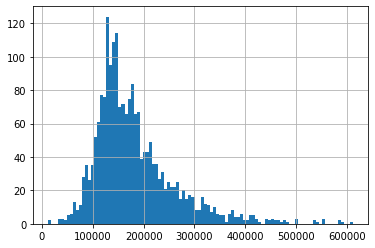

In [21]:
df['SalePrice'].hist(bins=100)

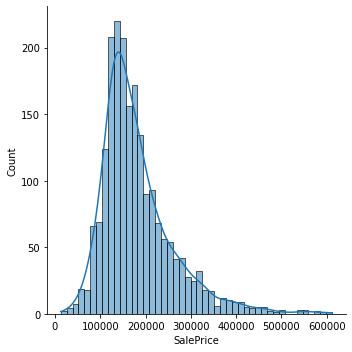

In [22]:
sns.displot(df['SalePrice'], kde=True)

<AxesSubplot:>

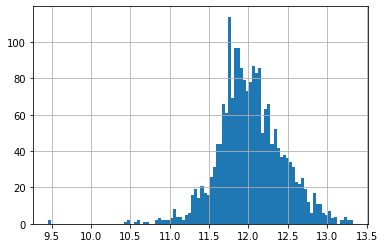

In [23]:
np.log(df['SalePrice']).hist(bins=100)

The distribution is skewed, with a peak around the \\$150k mark and a long tail towards the higher prices. A maximum of about \\$600k is observed, with a minimum somewhere around $10-20k.
When a log function is applied to the variable, it better approximates a normal distribution. 

Let's see whether the outliers on the high end can be explained.

In [24]:
df[df['SalePrice'] > 500000][['SalePrice', 'Gr Liv Area', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Neighborhood', 'Yr Sold', 'Sale Type']]

SalePrice  Gr Liv Area  Lot Area  Overall Qual  Overall Cond  \
81       501837         2234     17423             9             5   
138      545224         3390     18062            10             5   
151      556581         2868     16056             9             5   
623      552000         2492     14836            10             5   
800      500067         2290     17169            10             5   
823      538000         3279     53504             8             5   
1164     555000         2402     15431            10             5   
1592     535000         2698     16052            10             5   
1671     611657         2364     12919             9             5   
1692     584500         3500     17242             9             5   
1796     582933         2822     13891             9             5   
1964     591587         2338     51974             9             5   

     Neighborhood  Yr Sold Sale Type  
81        StoneBr     2009       New  
138       StoneBr     2006       New  
151       StoneBr     2006       New  
623       NridgHt     2009       WD   
800       NridgHt     2007       New  
823       StoneBr     2010       WD   
1164      NridgHt     2009       WD   
1592      StoneBr     2006       New  
1671      NridgHt     2010       New  
1692      NoRidge     2006       WD   
1796      NridgHt     2009       New  
1964      StoneBr     2007       New

In [25]:
df[['Gr Liv Area', 'Overall Qual']].describe()

Gr Liv Area  Overall Qual
count  2051.000000   2051.000000
mean   1499.330083      6.112140
std     500.447829      1.426271
min     334.000000      1.000000
25%    1129.000000      5.000000
50%    1444.000000      6.000000
75%    1728.500000      7.000000
max    5642.000000     10.000000

The high prices look explainable. They seem to be of the same neighborhood, great overall quality of finishing, and have large living areas.

In [26]:
df[df['SalePrice'] < 50000][['SalePrice', 'Gr Liv Area', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Neighborhood', 'Yr Sold', 'Sale Type']]

SalePrice  Gr Liv Area  Lot Area  Overall Qual  Overall Cond  \
103       44000          797      9392             3             3   
183       13100          733     14584             1             5   
408       40000         1317      8500             4             4   
1089      45000          612      5925             2             4   
1292      35000          498      8088             2             3   
1309      34900          720      7879             4             5   
1428      39300          334      5000             1             3   
1518      35311          480      9000             2             3   
1564      37900          968      5925             3             6   
1628      12789          832      9656             2             2   

     Neighborhood  Yr Sold Sale Type  
103        IDOTRR     2009       WD   
183        IDOTRR     2008       WD   
408        IDOTRR     2008       WD   
1089      OldTown     2009       WD   
1292      Edwards     2006     ConLD  
1309       IDOTRR     2009       WD   
1428      BrkSide     2007       WD   
1518       IDOTRR     2006       WD   
1564      OldTown     2009       WD   
1628      OldTown     2010       WD

The low prices also look explainable as they have relatively small living areas and are in poor quality and condition.

Out outliers on the high and low side seem to be accurate data, so we shall consider keeping them for now.

In [27]:
# save these variables for easy access later
rough_core_vars = ['SalePrice', 'Gr Liv Area', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Neighborhood', 'Yr Sold', 'Sale Type']

We will use some of these rough_core_vars as a features for one of the models later.

<br>

### Rough Correlation Visualisation of Numeric Variables 

Text(0.5, 1.0, 'Correlation Matrix with Pearson Correlation')

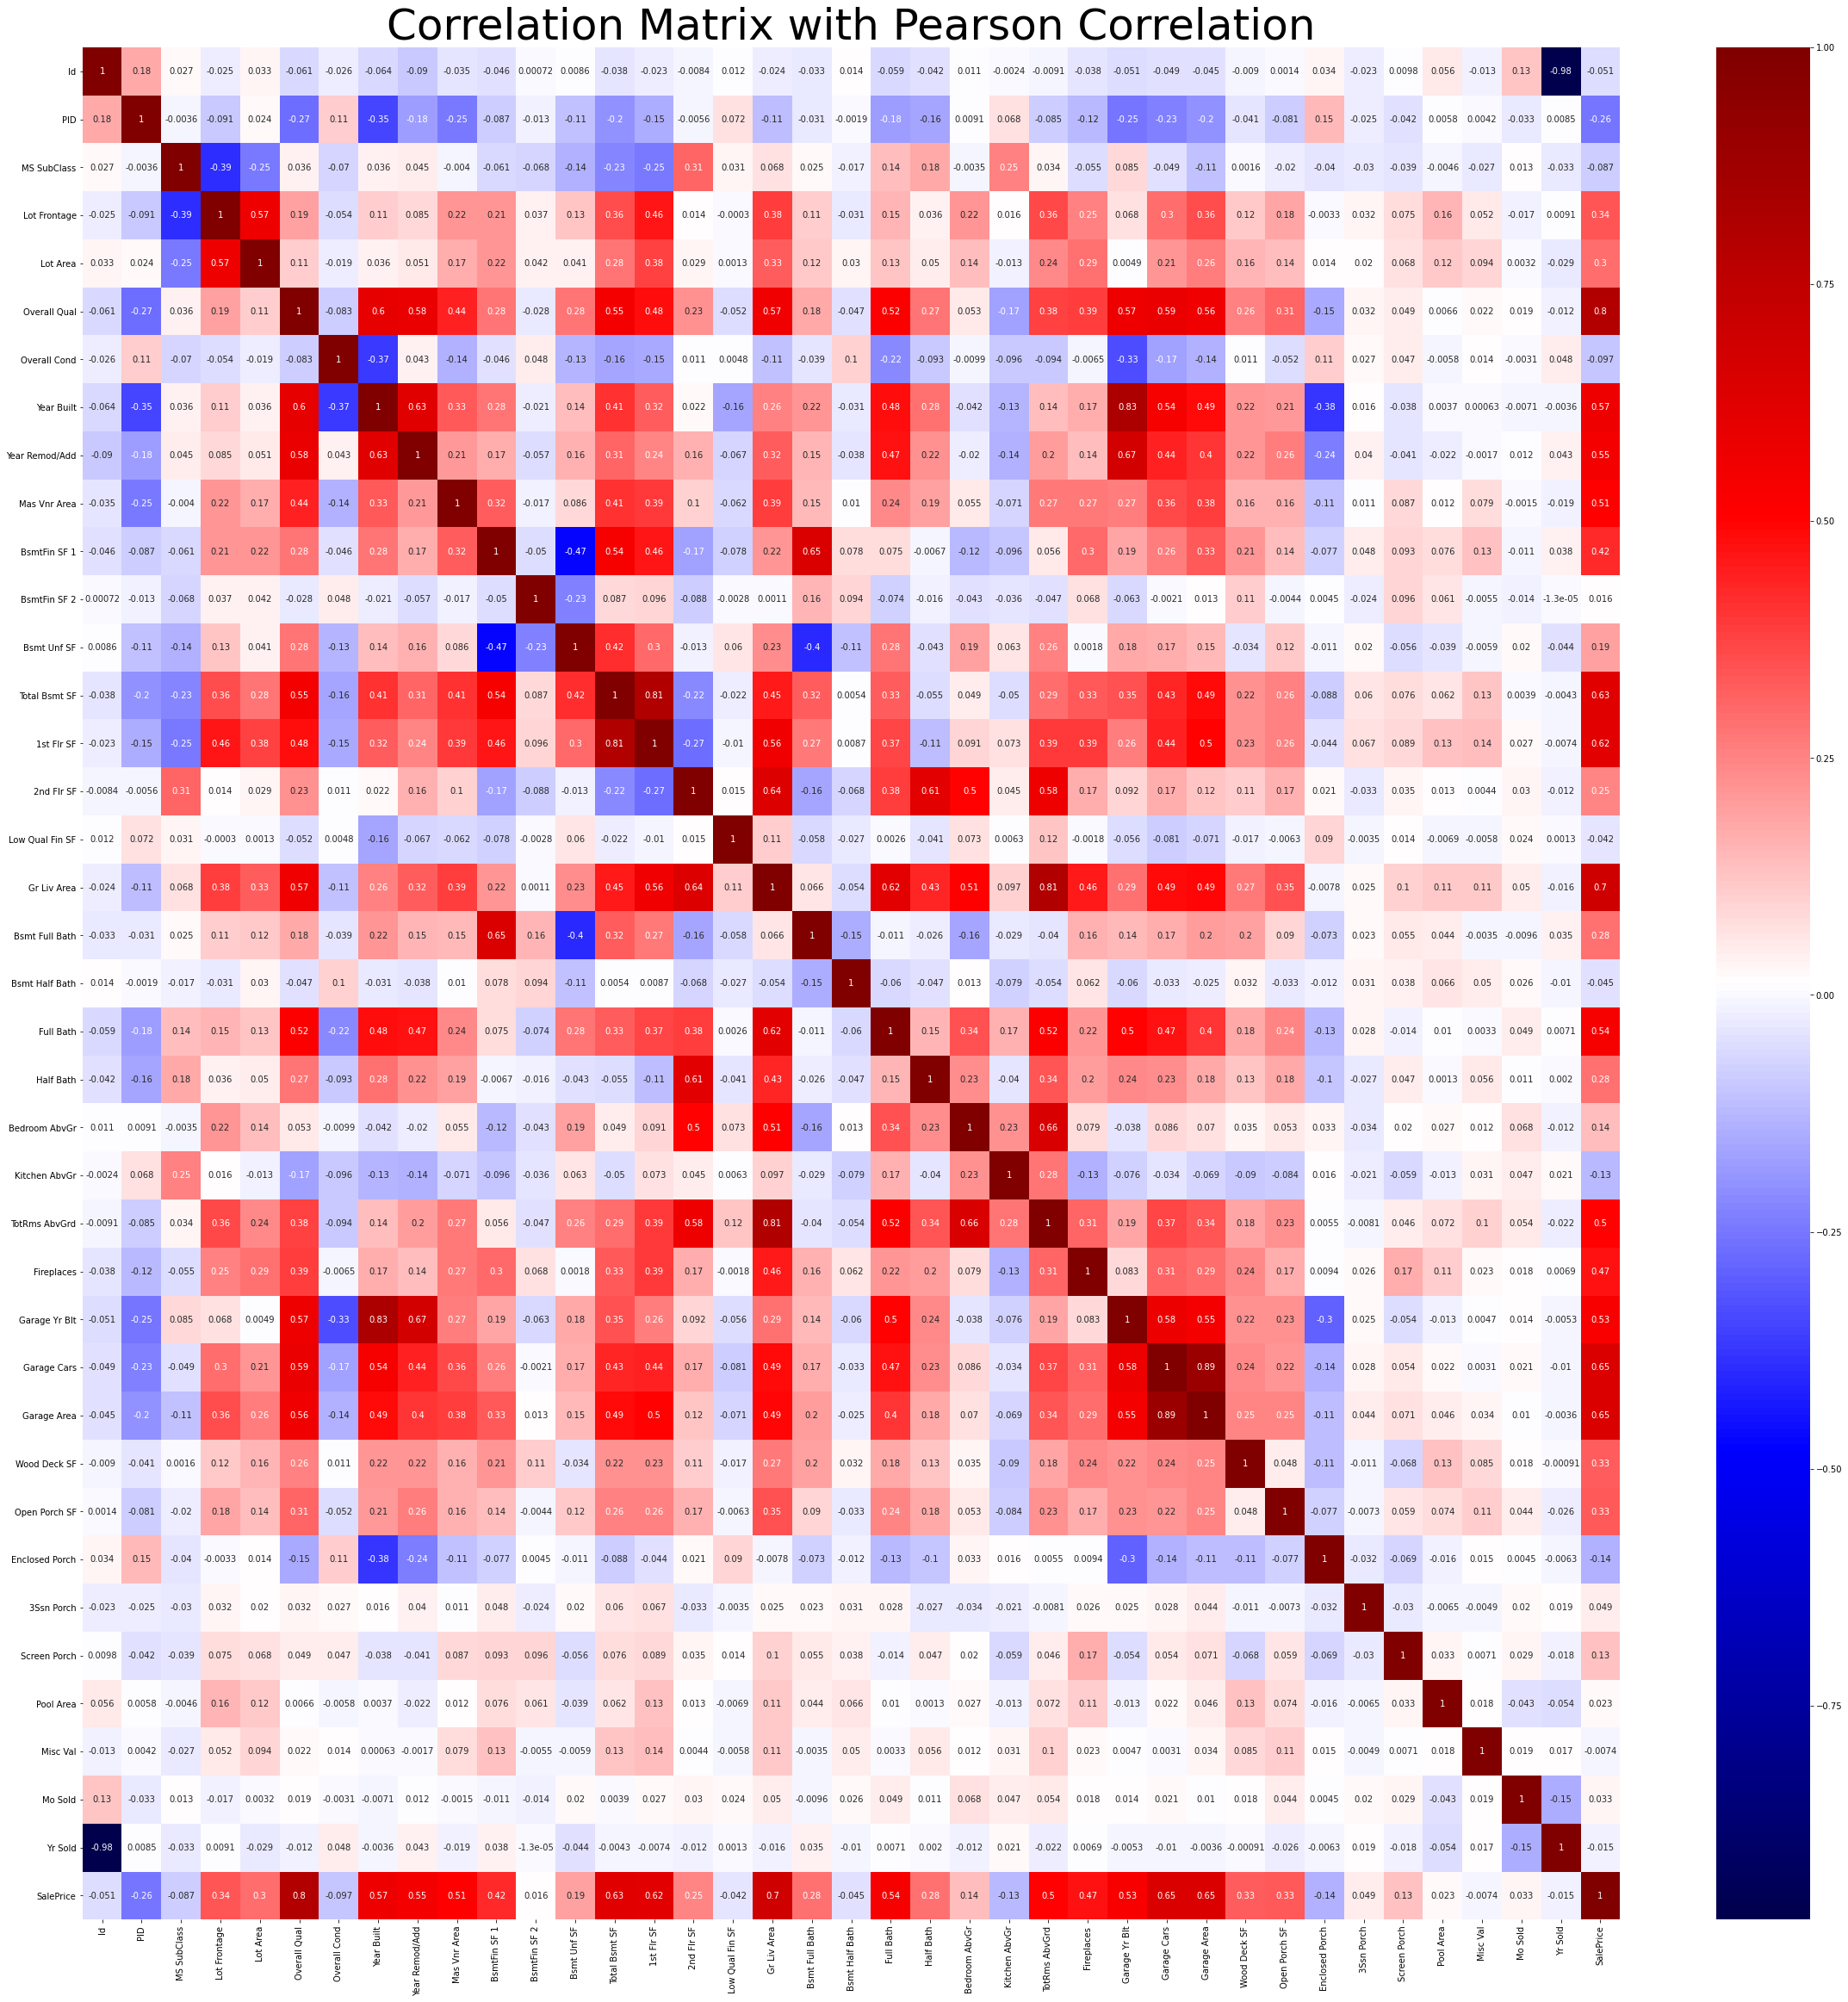

In [28]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot=True, cmap='seismic')
plt.title('Correlation Matrix with Pearson Correlation',
         fontsize = 50)

Text(0.5, 1.0, 'Correlation Matrix with SpearmanR Correlation')

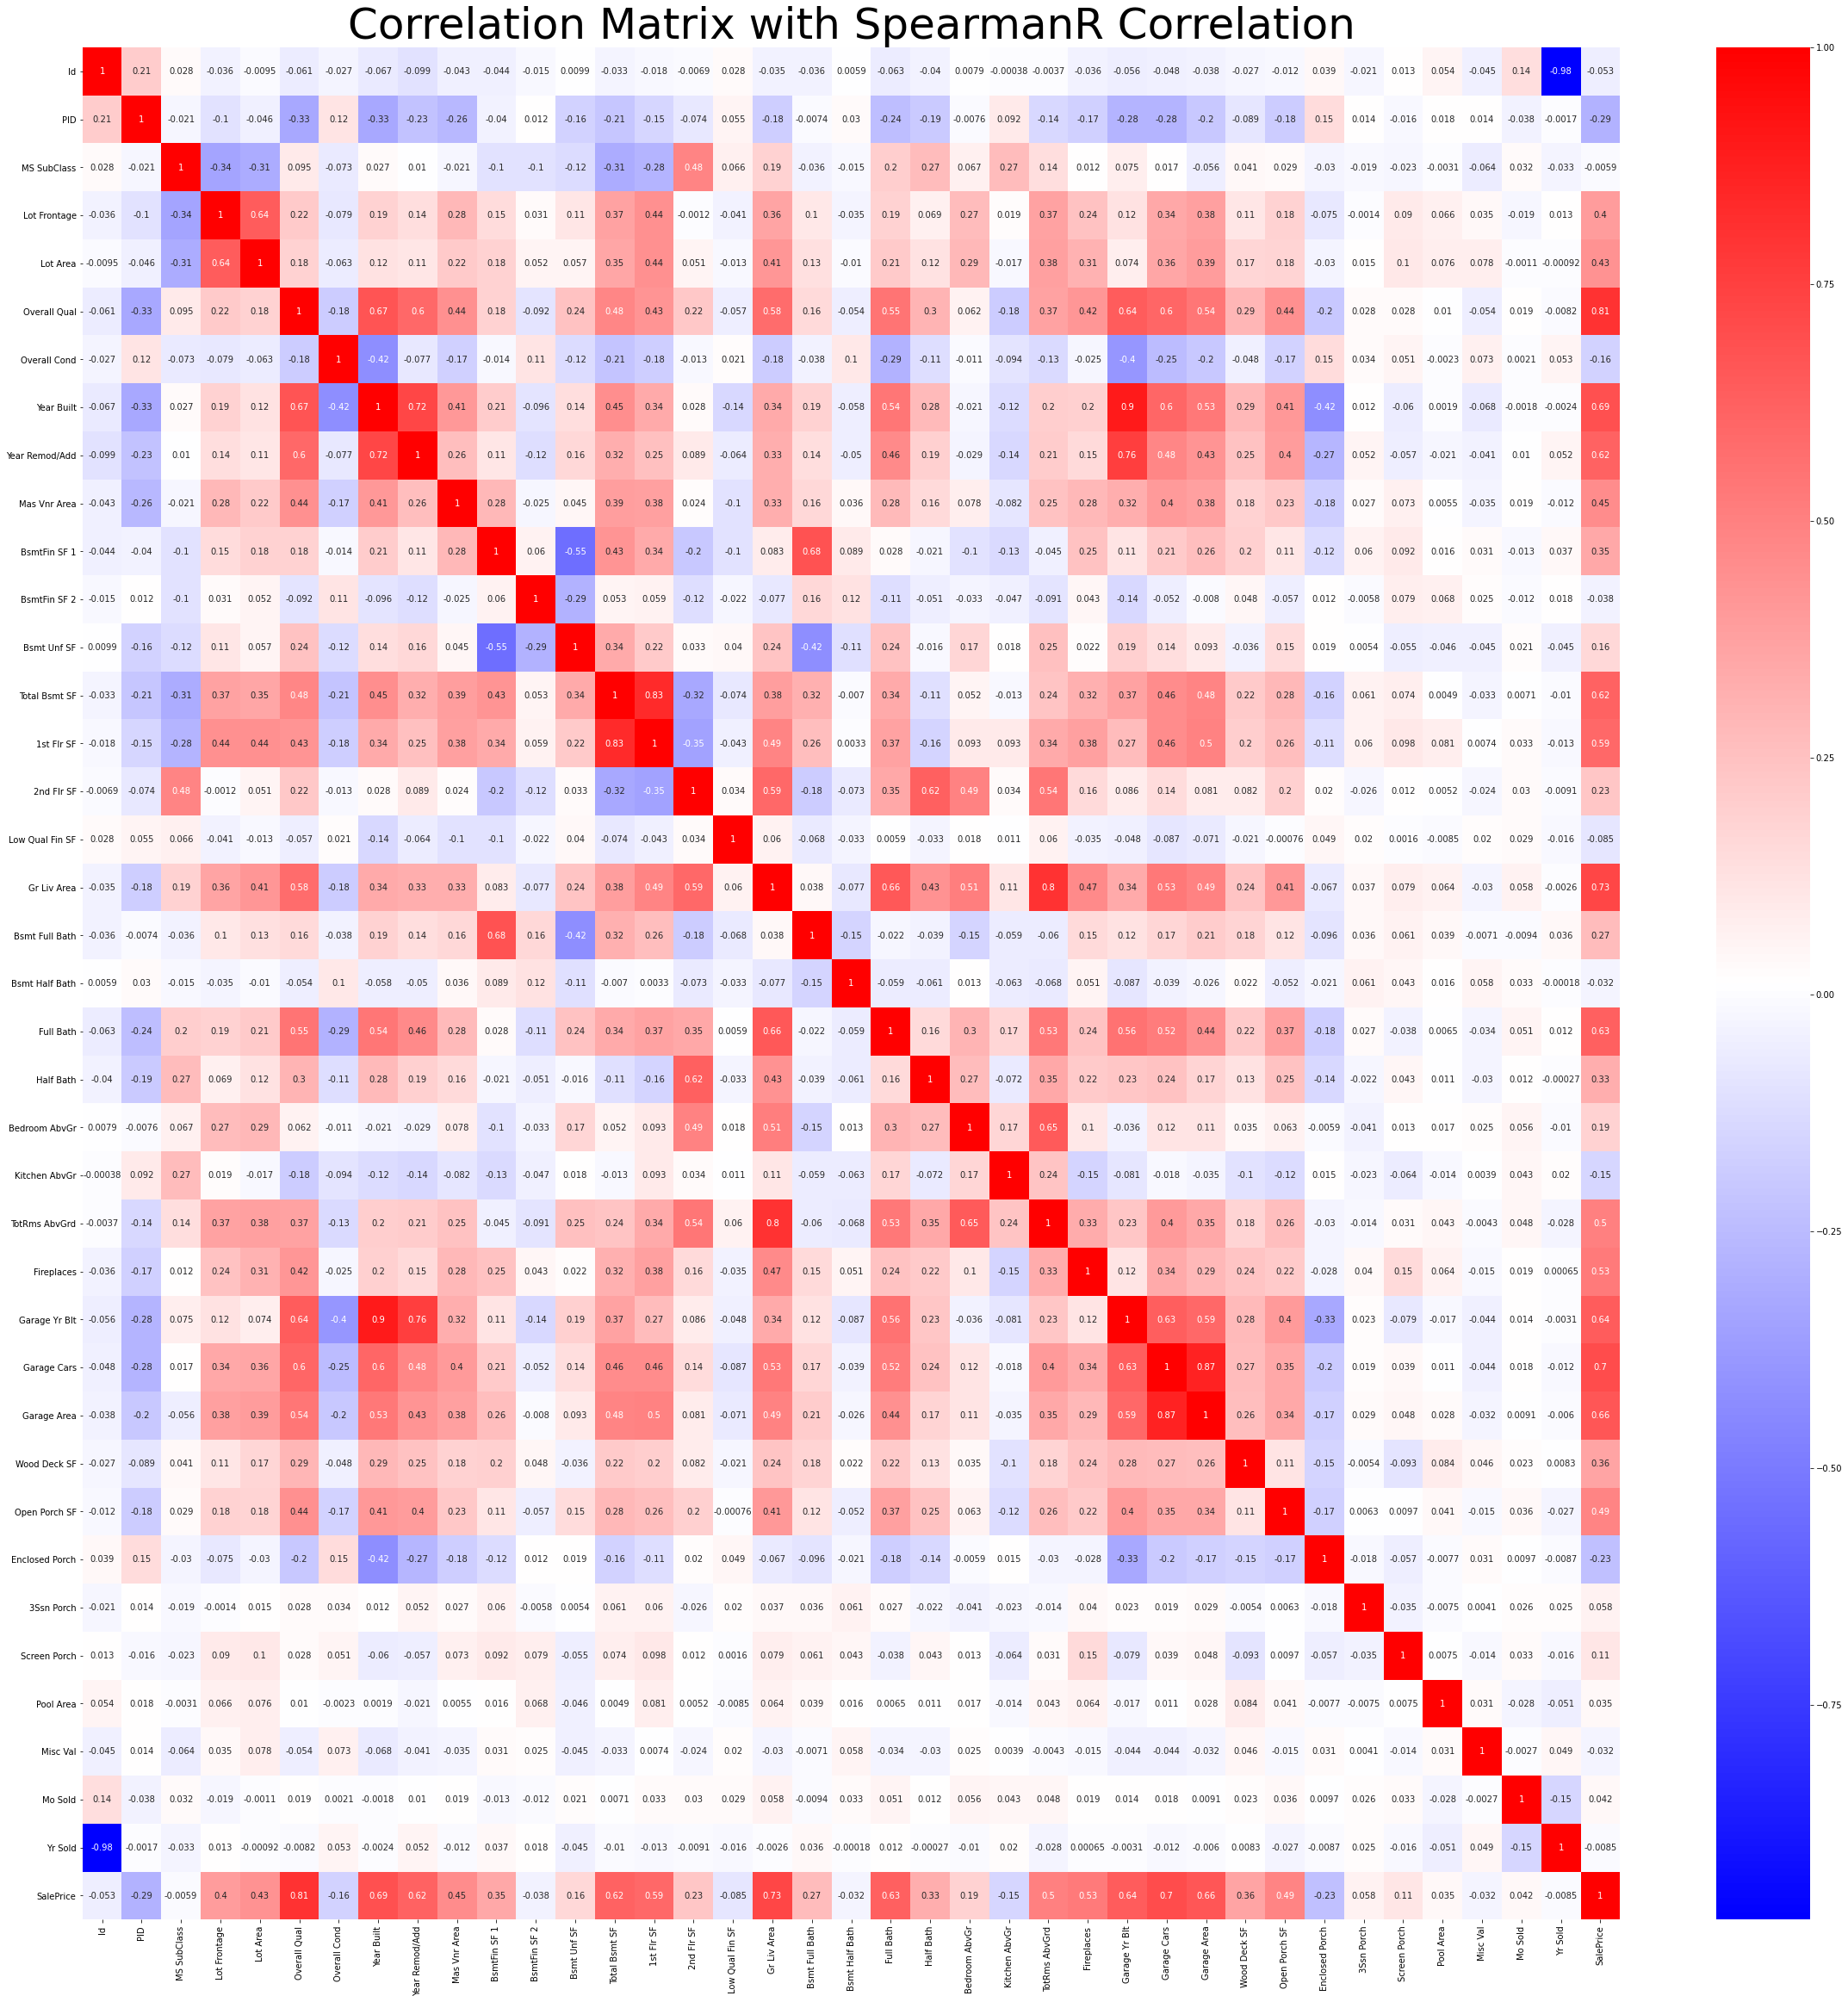

In [29]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='bwr')
plt.title('Correlation Matrix with SpearmanR Correlation',
         fontsize=50)

The correlation matrices are slightly difficult to read due to the large amount of features.

After selecting features in subsequent steps, a new matrix willl be plot with shortlisted features.

For now these will be used as rough reference when deciding whether to drop features. The focus should be on the last row of the matrix as that depics the correlation of the predictor variables to the target ('SalePrice').

So far, what aligns with expectations is that overall quality, year built (later year means newer house) and gross living area are strongly postitively correlated with price.

What is interesting is that garage-related features like garage year have strong correlation with price. It is also interesting that PID has some form of positive correlation with price despite it seeming like a very useless feature.

What might be causing the year garages were built to be positively correlated with price? One reason is because houses with garages might generally cost more. The other reason is that the garage year built just coincides mostly with the year built, which makes sense to be indicative of price. 

In [30]:
df['Year Built'].isna().sum()

0

In [31]:
df['Garage Yr Blt'].isna().sum()

114

In [32]:
garage_not_na = df['Garage Yr Blt'].notna()

In [33]:
stats.spearmanr(df[garage_not_na]['Year Built'], df[garage_not_na]['Garage Yr Blt'])

SpearmanrResult(correlation=0.8968698054277447, pvalue=0.0)

Indeed, the garage year built is highly correlated to year built, and year built is likely to be a more reliable variable.

<br>
<br>

## Visualise Distribution of Variables

In [34]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

Each variable will be examined and organised into a sensible clusters of variables to make analysis more systematic.

First the numeric variables will be examined to be further organised. After that, the categorical variables will be examined.

In [35]:
# organise variables as we go along

# initiate discrete variables (that do not fall into any of the categories below)
discr_vars = set()

# initiate nominal variables (categorical variables with no intrinsic order)
nom_vars = set()

# initiate ordinal variables (categorical variables with an order)
ord_vars = set()

# initiate size (area/distance) variables (continuous)
size_vars = set()

# initiate time variables
time_vars = set()

# initiate price variables (continuous)
price_vars = set()

# initiate binary variables
bin_vars = set()

# initiate id variables
id_vars = {'Id', 'PID'}


In [36]:
# starting to see some potentially redundant variables; consolidate them for easier inspection later
drop_vars = {'Id'}

### Histograms of Numeric Variables

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'PID'}>,
        <AxesSubplot:title={'center':'MS SubClass'}>],
       [<AxesSubplot:title={'center':'Lot Frontage'}>,
        <AxesSubplot:title={'center':'Lot Area'}>,
        <AxesSubplot:title={'center':'Overall Qual'}>],
       [<AxesSubplot:title={'center':'Overall Cond'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

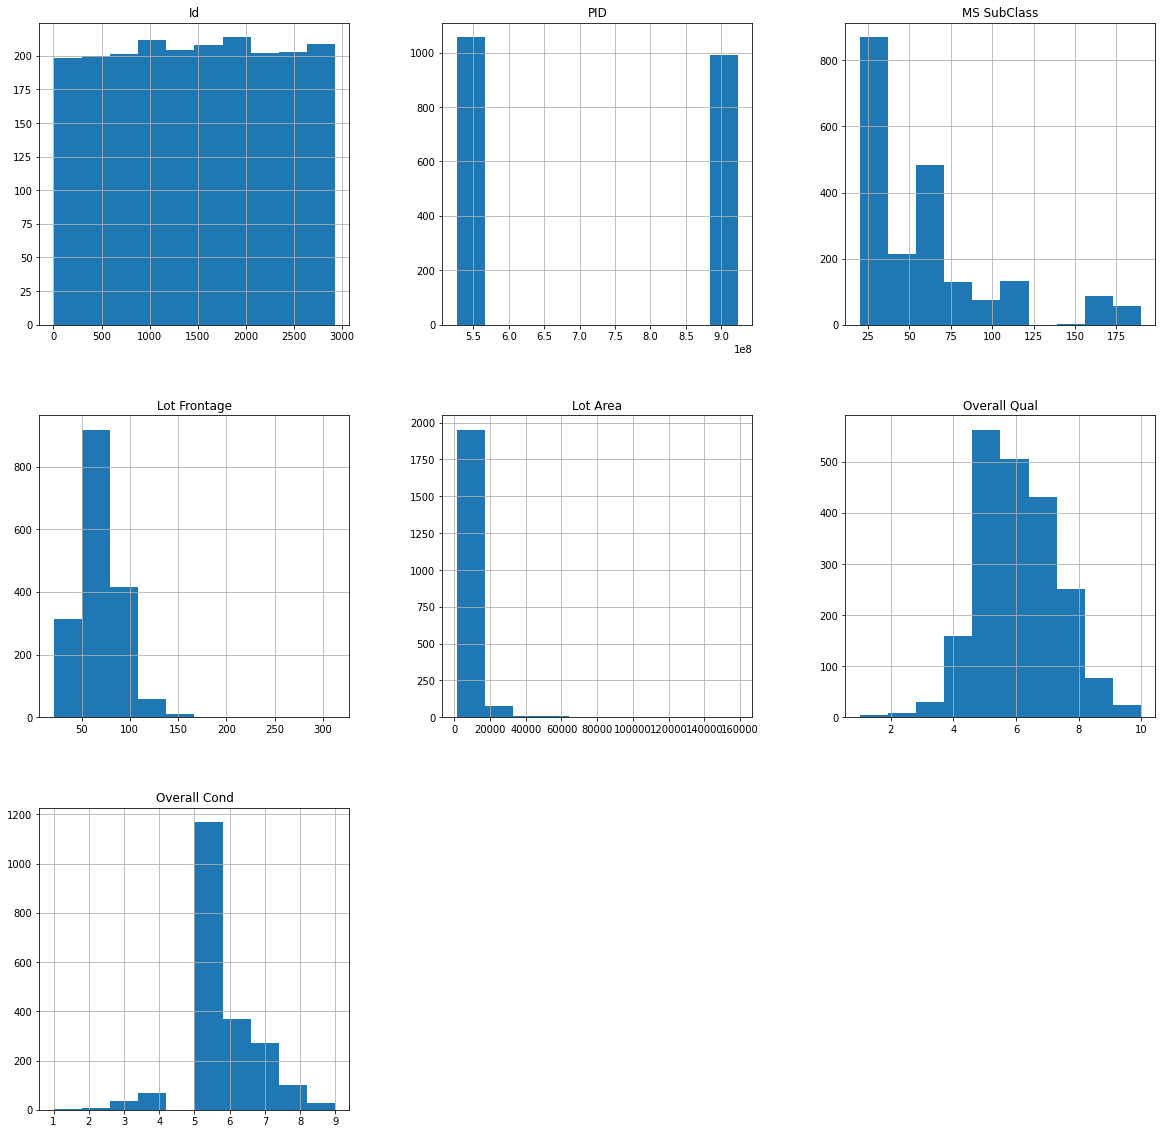

In [37]:
df.iloc[:,:20].hist(figsize=(20,20))

In [38]:
nom_vars.add('PID')

<AxesSubplot:xlabel='PID', ylabel='SalePrice'>

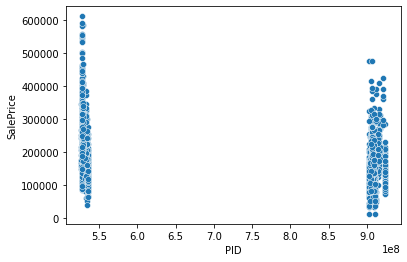

In [39]:
sns.scatterplot(data=df, x='PID', y='SalePrice')

<AxesSubplot:xlabel='PID', ylabel='SalePrice'>

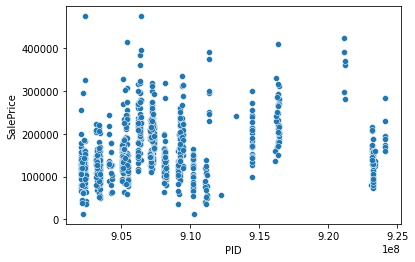

In [40]:
sns.scatterplot(data=df[df['PID'] > 600000000], x='PID', y='SalePrice')

In [41]:
df[df['PID'] > 600000000]['SalePrice'].mean()

160845.35146022154

In [42]:
df[df['PID'] > 600000000]['PID'].min()

902100010

In [43]:
df[df['PID'] <= 600000000]['SalePrice'].mean()

200826.96030245748

In [44]:
df[df['PID'] <= 600000000]['PID'].max()

535478110

<AxesSubplot:xlabel='PID', ylabel='SalePrice'>

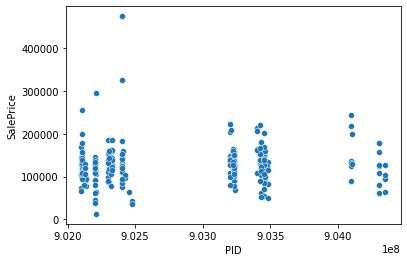

In [45]:
sns.scatterplot(data=df[(df['PID'] > 600000000) & (df['PID'] < 905000000)], x='PID', y='SalePrice')

<AxesSubplot:xlabel='PID', ylabel='SalePrice'>

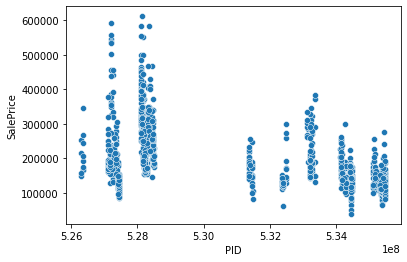

In [46]:
sns.scatterplot(data=df[df['PID'] <= 600000000], x='PID', y='SalePrice')

<AxesSubplot:xlabel='PID', ylabel='SalePrice'>

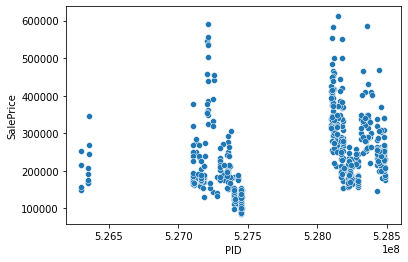

In [47]:
sns.scatterplot(data=df[df['PID'] <= 530000000], x='PID', y='SalePrice')

PID should be converted to a binary variable that represents the two groups, PID starting with 5 and PID starting with 9.

In [48]:
df['MS SubClass'].value_counts()

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
180     11
45      11
40       4
150      1
Name: MS SubClass, dtype: int64

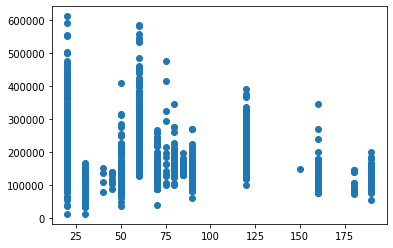

In [49]:
plt.scatter(data=df, x='MS SubClass', y='SalePrice')

Although 'MS SubClass' looks numeric, it seems to be more of a nominal variable for each number code representing a different type of building class that does not have an apparent intrinsic order.

There seems to be quite a spread for the different classes. Upon closer inspection, it seems that the price is likely more explainable by other features such as year the house was built and size of the house. This feature will be selected to be dropped for now.

In [50]:
nom_vars.add('MS SubClass')
drop_vars.add('MS SubClass')

In [51]:
df['Overall Cond'].value_counts()

5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: Overall Cond, dtype: int64

In [52]:
df['Overall Qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall Qual, dtype: int64

In [53]:
size_vars.add('Lot Frontage')
size_vars.add('Lot Area')
ord_vars.add('Overall Qual')
ord_vars.add('Overall Cond')

array([[<AxesSubplot:title={'center':'Year Built'}>,
        <AxesSubplot:title={'center':'Year Remod/Add'}>,
        <AxesSubplot:title={'center':'Mas Vnr Area'}>],
       [<AxesSubplot:title={'center':'BsmtFin SF 1'}>,
        <AxesSubplot:title={'center':'BsmtFin SF 2'}>,
        <AxesSubplot:title={'center':'Bsmt Unf SF'}>],
       [<AxesSubplot:title={'center':'Total Bsmt SF'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

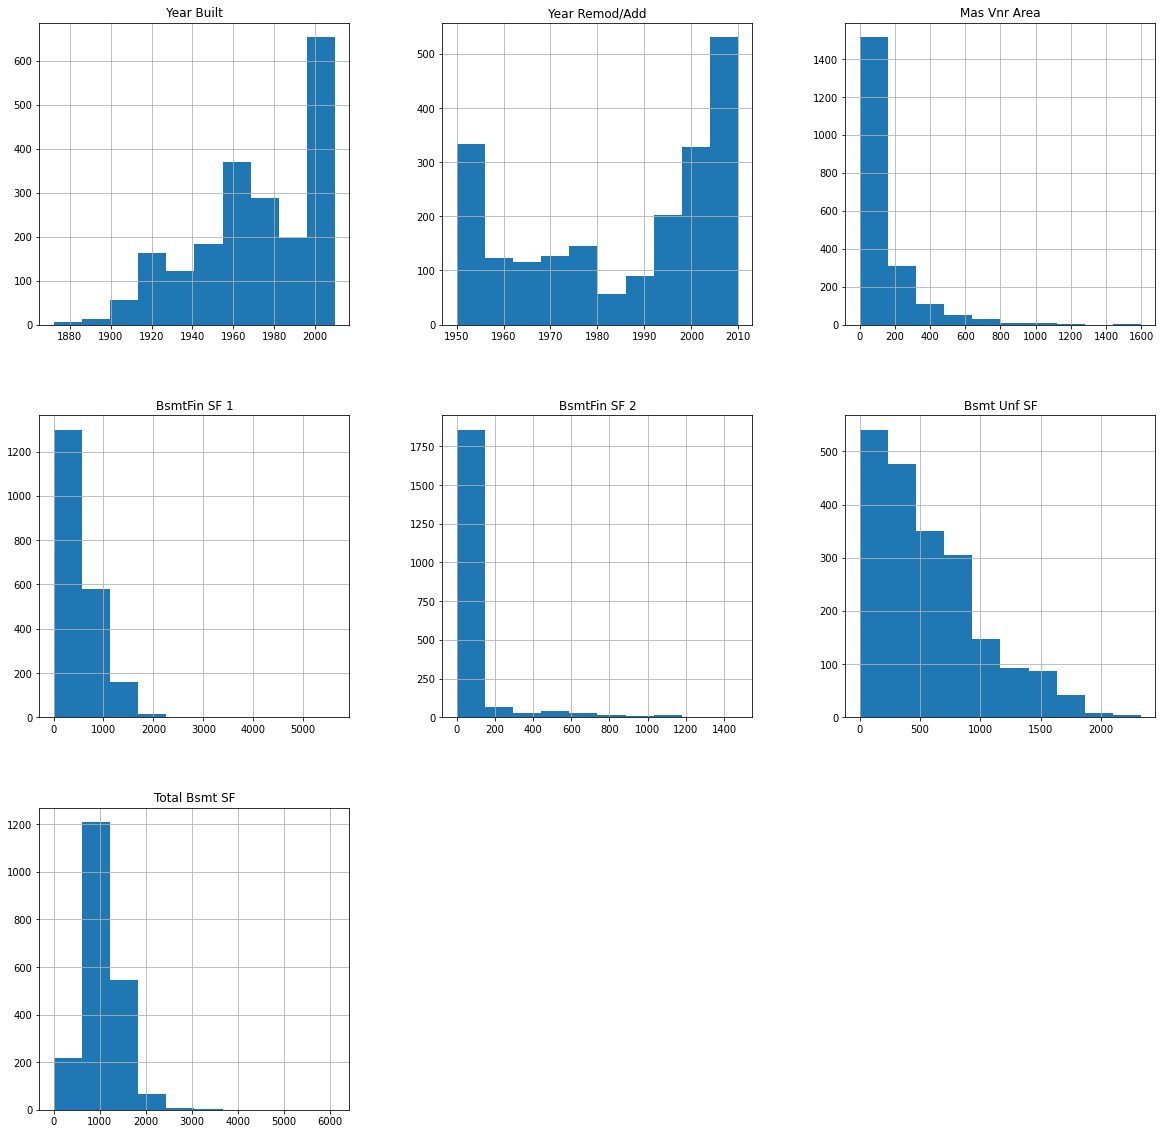

In [54]:
df.iloc[:,20:40].hist(figsize=(20,20))

In [55]:
time_vars.add('Year Built')
time_vars.add('Year Remod/Add')
size_vars.add('Mas Vnr Area')
size_vars.add('BsmtFin SF 1')
size_vars.add('BsmtFin SF 2')
size_vars.add('Bsmt Unf SF')
size_vars.add('Total Bsmt SF')

In [56]:
# seems unhelpful, we can take the total bsmt sf
drop_vars.add('BsmtFin SF 1')
drop_vars.add('BsmtFin SF 2')

array([[<AxesSubplot:title={'center':'1st Flr SF'}>,
        <AxesSubplot:title={'center':'2nd Flr SF'}>,
        <AxesSubplot:title={'center':'Low Qual Fin SF'}>],
       [<AxesSubplot:title={'center':'Gr Liv Area'}>,
        <AxesSubplot:title={'center':'Bsmt Full Bath'}>,
        <AxesSubplot:title={'center':'Bsmt Half Bath'}>],
       [<AxesSubplot:title={'center':'Full Bath'}>,
        <AxesSubplot:title={'center':'Half Bath'}>,
        <AxesSubplot:title={'center':'Bedroom AbvGr'}>],
       [<AxesSubplot:title={'center':'Kitchen AbvGr'}>,
        <AxesSubplot:title={'center':'TotRms AbvGrd'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>]], dtype=object)

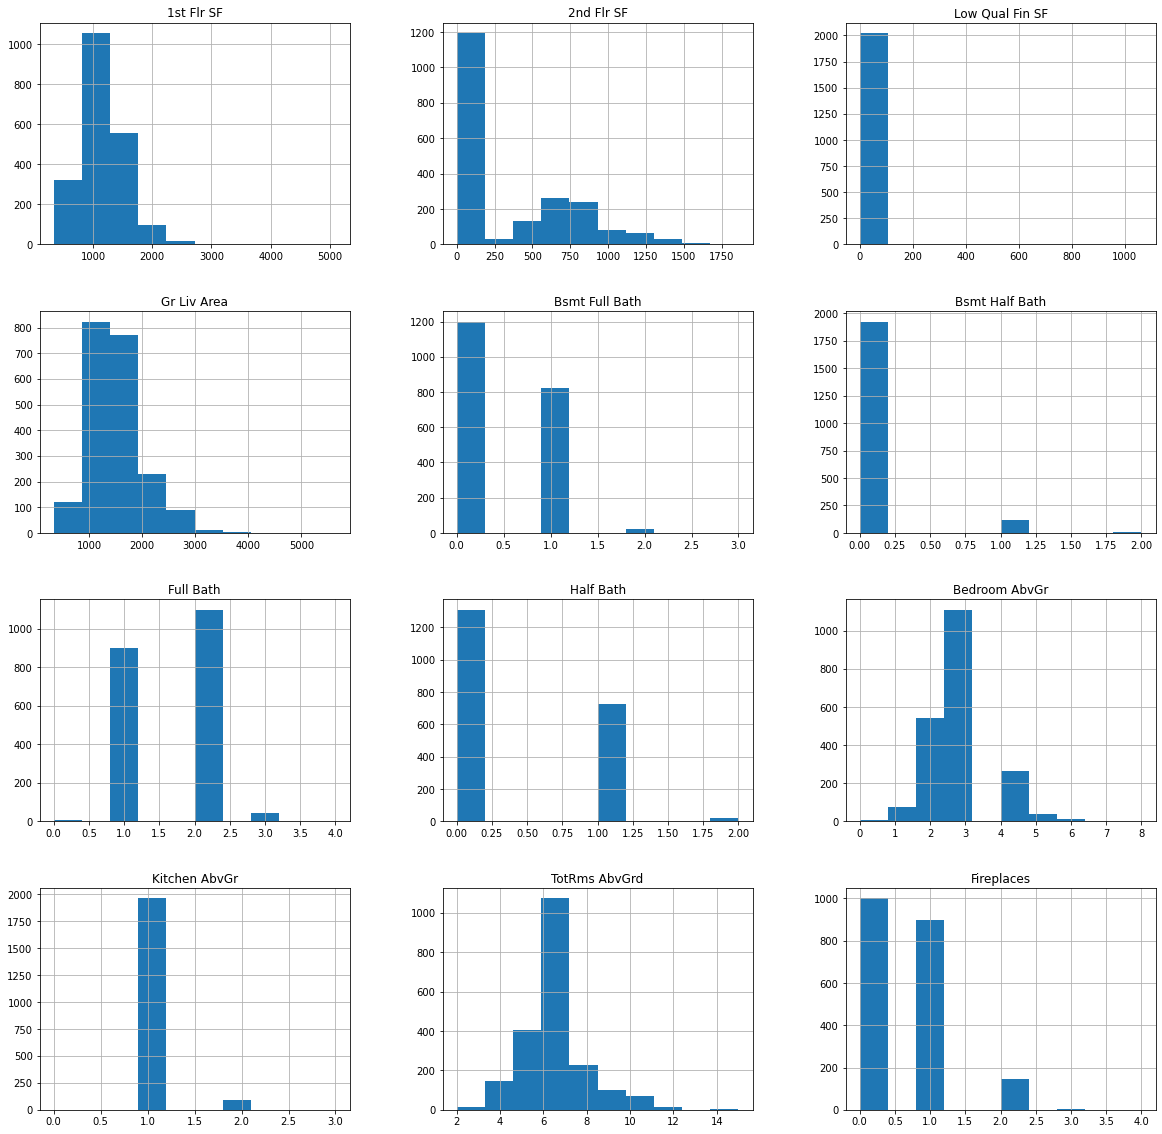

In [57]:
df.iloc[:,40:60].hist(figsize=(20,20))

In [58]:
for c in ['Bsmt Half Bath', 'Bsmt Full Bath', 'Full Bath', 'Half Bath']:
    print(df[c].value_counts())

0.0    1923
1.0     122
2.0       4
Name: Bsmt Half Bath, dtype: int64
0.0    1200
1.0     824
2.0      23
3.0       2
Name: Bsmt Full Bath, dtype: int64
2    1096
1     900
3      45
0       8
4       2
Name: Full Bath, dtype: int64
0    1308
1     725
2      18
Name: Half Bath, dtype: int64


In [59]:
df[df['1st Flr SF'] != df['2nd Flr SF']][['1st Flr SF', '2nd Flr SF']]

1st Flr SF  2nd Flr SF
0            725         754
1            913        1209
2           1057           0
3            744         700
4            831         614
...          ...         ...
2046        1728           0
2047         861           0
2048        1172         741
2049        1200           0
2050        1028         776

[1965 rows x 2 columns]

In [60]:
df[df['1st Flr SF'] == df['2nd Flr SF']][['1st Flr SF', '2nd Flr SF']]

1st Flr SF  2nd Flr SF
9           1040        1040
52          1392        1392
53           546         546
56           600         600
80           616         616
...          ...         ...
1991         912         912
1993         892         892
2007         546         546
2019         768         768
2039         546         546

[86 rows x 2 columns]

Note that first and second floor area not always equal.

In [61]:
df['Low Qual Fin SF'].describe()

count    2051.000000
mean        5.512921
std        51.068870
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: Low Qual Fin SF, dtype: float64

In [62]:
for c in ['Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces']:
    print(df[c].value_counts())

3    1108
2     544
4     265
1      75
5      41
6      12
0       5
8       1
Name: Bedroom AbvGr, dtype: int64
1    1960
2      88
0       2
3       1
Name: Kitchen AbvGr, dtype: int64
6     597
7     475
5     407
8     228
4     146
9      98
10     49
11     22
12     13
3      12
2       1
14      1
13      1
15      1
Name: TotRms AbvGrd, dtype: int64
0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64


In [63]:
df[df['TotRms AbvGrd']>12][rough_core_vars + ['TotRms AbvGrd']]

SalePrice  Gr Liv Area  Lot Area  Overall Qual  Overall Cond  \
858      200000         3395     10896             6             7   
1791     205000         2480      8145             7             6   
1885     183850         5095     39290            10             5   

     Neighborhood  Yr Sold Sale Type  TotRms AbvGrd  
858         SWISU     2007       WD              14  
1791      Crawfor     2009       WD              13  
1885      Edwards     2007       New             15

In [64]:
size_vars = size_vars.union(['1st Flr SF', '2nd Flr SF','Low Qual Fin SF','Gr Liv Area'])

discr_vars = discr_vars.union(['Bsmt Full Bath', 'Bsmt Half Bath',
                  'Full Bath', 'Half Bath',
                  'Bedroom AbvGr', 'Kitchen AbvGr',
                  'TotRms AbvGrd','Fireplaces'])

array([[<AxesSubplot:title={'center':'Garage Yr Blt'}>,
        <AxesSubplot:title={'center':'Garage Cars'}>,
        <AxesSubplot:title={'center':'Garage Area'}>],
       [<AxesSubplot:title={'center':'Wood Deck SF'}>,
        <AxesSubplot:title={'center':'Open Porch SF'}>,
        <AxesSubplot:title={'center':'Enclosed Porch'}>],
       [<AxesSubplot:title={'center':'3Ssn Porch'}>,
        <AxesSubplot:title={'center':'Screen Porch'}>,
        <AxesSubplot:title={'center':'Pool Area'}>],
       [<AxesSubplot:title={'center':'Misc Val'}>,
        <AxesSubplot:title={'center':'Mo Sold'}>,
        <AxesSubplot:title={'center':'Yr Sold'}>]], dtype=object)

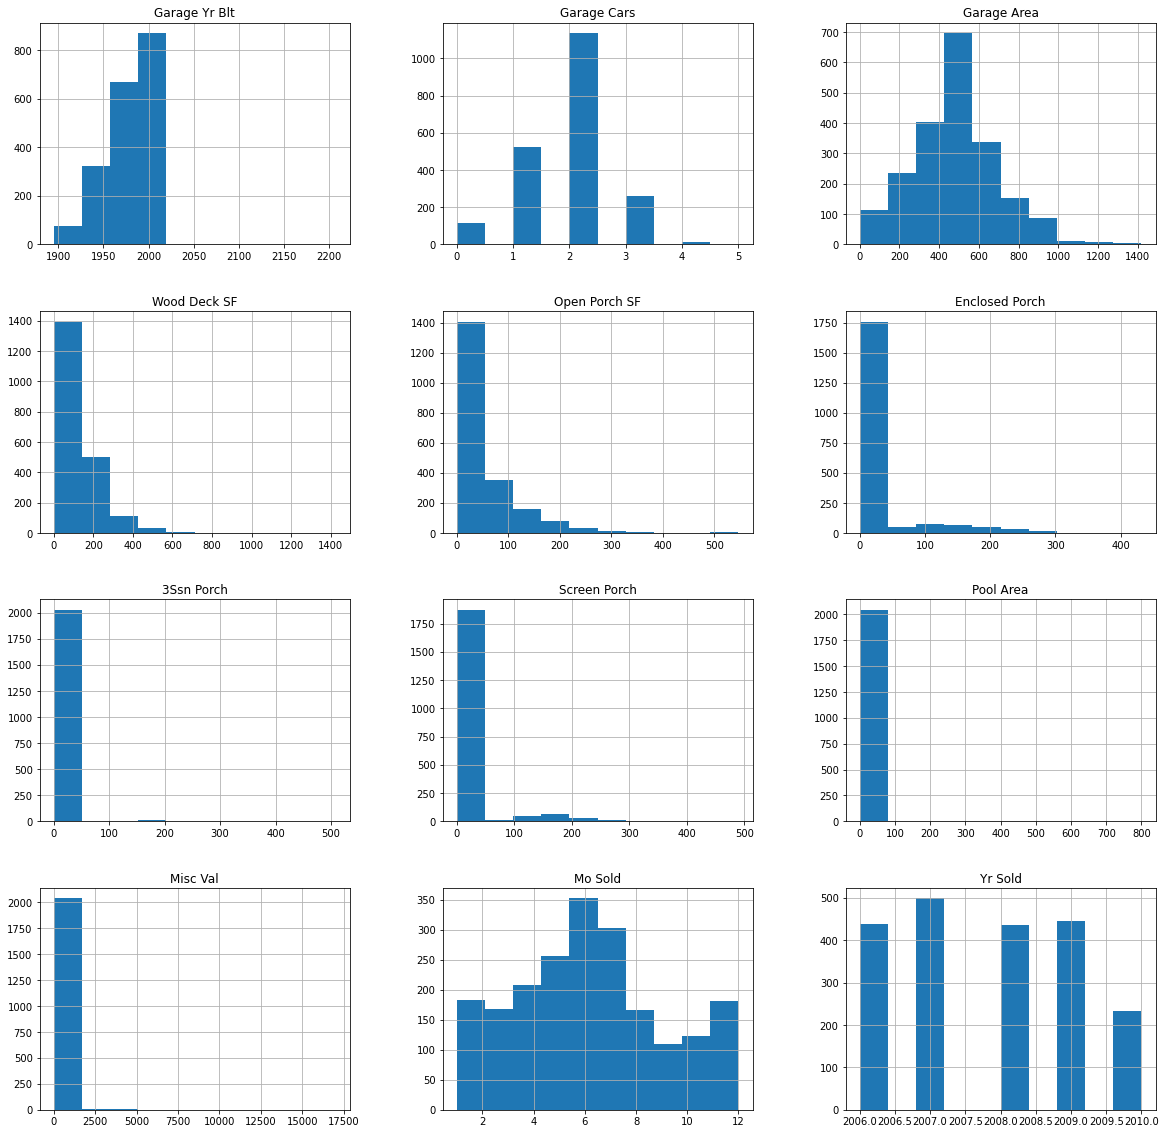

In [65]:
df.iloc[:,60:-1].hist(figsize=(20,20))

In [66]:
df['Garage Cars'].describe()

count    2050.000000
mean        1.776585
std         0.764537
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: Garage Cars, dtype: float64

In [67]:
df['Garage Cars'].mode()

0    2.0
dtype: float64

In [68]:
df['Pool Area'].describe()

count    2051.000000
mean        2.397855
std        37.782570
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: Pool Area, dtype: float64

In [69]:
df[df['Pool Area'] > 100][rough_core_vars+['Pool Area']]

SalePrice  Gr Liv Area  Lot Area  Overall Qual  Overall Cond  \
52       250000         2784     16692             7             5   
657      171000         1118      9880             6             6   
761      260000         2646     14330             7             4   
952      315000         2726     18044             8             5   
960      160000         5642     63887            10             5   
1130     181000         1309     10140             6             6   
1249     274970         2201     19690             6             7   
1635     153000         1647      9532             4             6   
1875     130000         2034     43500             3             5   

     Neighborhood  Yr Sold Sale Type  Pool Area  
52         NWAmes     2006       WD         519  
657       Mitchel     2008       WD         576  
761       Veenker     2006       WD         800  
952       Crawfor     2007       WD         228  
960       Edwards     2008       New        480  
1130       NWAmes     2006       WD         648  
1249      Edwards     2006       WD         738  
1635        NAmes     2007       WD         368  
1875      Mitchel     2007       WD         561

In [70]:
stats.pearsonr(df['Garage Cars'].fillna(0), df['Garage Area'].fillna(0))

(0.8934415694476643, 0.0)

In [71]:
df[['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area']].isna().sum()

Wood Deck SF      0
Open Porch SF     0
Enclosed Porch    0
3Ssn Porch        0
Screen Porch      0
Pool Area         0
dtype: int64

In [72]:
df[['Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 
    '3Ssn Porch', 'Screen Porch', 'Pool Area']].mode()

Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
0          0.0             0              0               0           0   

   Screen Porch  Pool Area  
0             0          0

According tothe  [data dictionary](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data):
The following are special areas of a house in square feet, but it seems that these areas would not be present in every house. We checked that there are no null values, but the distributions show a large amount of values at zero, explaining the houses that do not have such an area.

- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet

In [73]:
time_vars.add('Garage Yr Blt')

drop_vars.add('Garage Yr Blt')

As seen, the garage year built can be better explained by year built in general, and/or just the presence of a garage which is already reflected in other features. Hence, it will be dropped as a feature.

In [74]:
discr_vars.add('Garage Cars')
size_vars.add('Garage Area')

size_vars.add('Wood Deck SF')
size_vars.add('Open Porch SF')
size_vars.add('Enclosed Porch')
size_vars.add('3Ssn Porch')
size_vars.add('Screen Porch')
size_vars.add('Pool Area')

price_vars.add('Misc Val')

time_vars.add('Mo Sold') #month sold
time_vars.add('Yr Sold')

### Exploring Non-Numeric Variables

In [75]:
str_vars

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

In [76]:
len(str_vars)

42

In [77]:
str_vars[:9]

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood']

In [78]:
def subplot_vc_bars(dataframe, list_of_columns):
    """
    Create subplots for bar charts to show distribution of labels for non-numeric data.
    """
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20,20))
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.6)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        df[column].value_counts().plot(kind='barh', ax=ax[i])
        ax[i].set_title(f'Value Counts for {column}')

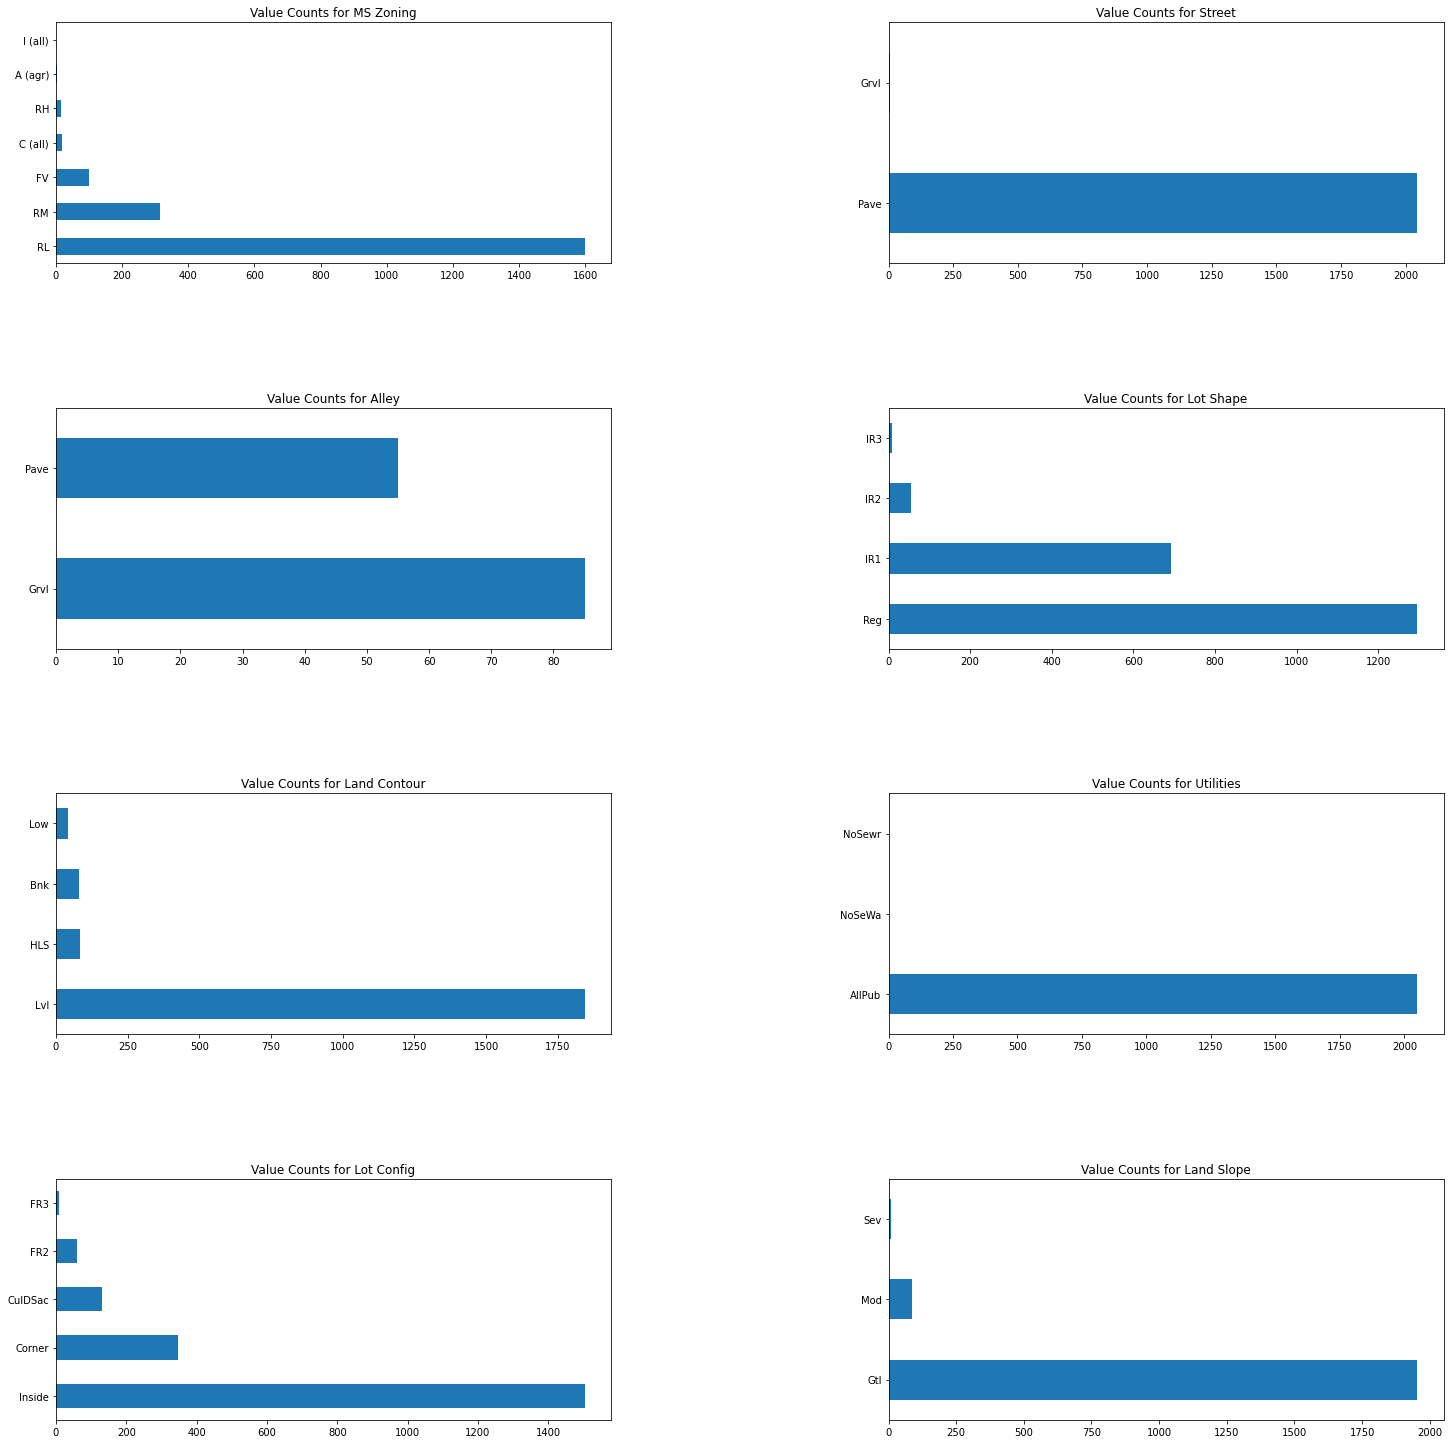

In [79]:
subplot_vc_bars(df, str_vars[:8])

In [80]:
bin_vars = bin_vars.union(['Street', 'Alley'])
nom_vars = nom_vars.union(['MS Zoning', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope'])

In [81]:
def check_same(l1, l2):
    """
    Checks that two lists' elements are the same to ensure coverage of the list.
    Returns True if so. Assumes each list does not have duplicates.
    """
    assert(len(l1) == len(l2))
    assert(len(set(l1+l2)) == len(l1))
    return True 

In [82]:
check_same(str_vars[:8], ['Street', 'Alley']+
           ['MS Zoning', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope'])

True

In [83]:
df['MS Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [84]:
df.groupby('MS Zoning').mean()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

SalePrice
MS Zoning               
FV         218618.316832
RL         191235.164581
RH         148859.571429
RM         129119.142405
C (all)     78010.894737
I (all)     57625.000000
A (agr)     47300.000000

For MS Zoning, the FV value seems to be of significance.

In [85]:
df['Street'].value_counts()

Pave    2044
Grvl       7
Name: Street, dtype: int64

In [86]:
# looks like a useless variable without enough examples per label
drop_vars.add('Street')

In [87]:
df.groupby('Land Contour').mean()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

SalePrice
Land Contour               
HLS           262353.376471
Low           199313.116279
Lvl           178998.564840
Bnk           142868.775000

In [88]:
df['Land Contour'].value_counts()

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64

Makes sense that HLS would have higher price, houses on a hill have a nice view and might cost more.

In [89]:
df['Utilities'].value_counts()

AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

In [90]:
# looks like a useless variable without enough examples per label
drop_vars.add('Utilities')

In [91]:
df.groupby('Lot Config').mean()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

SalePrice
Lot Config               
CulDSac     230744.358779
FR3         198600.000000
Corner      180629.591954
Inside      177537.014637
FR2         174703.600000

In [92]:
df['Lot Config'].value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

Makes sense that houses at a cul-de-sac would cost more due to privacy.

In [93]:
df['Land Slope'].value_counts()

Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64

In [94]:
# looks like a useless variable without enough examples per label
drop_vars.add('Land Slope')

#### Analysis of Neighborhoods

There are a lot of neighborhoods. The goal will be to try to meaningfully bucket them into clusters to that there will be no feature bloat of having a dummy variable for every neighborhood.

In [95]:
str_vars[8]

'Neighborhood'

In [96]:
df['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [97]:
df.groupby('Neighborhood').mean()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

SalePrice
Neighborhood               
StoneBr       329675.736842
NridgHt       322831.352459
NoRidge       316294.125000
GrnHill       280000.000000
Veenker       253570.588235
Timber        241051.354167
Somerst       227183.900000
ClearCr       217490.074074
Crawfor       205901.211268
CollgCr       202497.216667
Blmngtn       200417.681818
NWAmes        194619.022989
Gilbert       189228.387931
Greens        188666.666667
SawyerW       187760.160920
Mitchel       167656.707317
NAmes         145905.816129
Blueste       144566.666667
NPkVill       140476.470588
Sawyer        137181.909910
Landmrk       137000.000000
SWISU         134758.875000
Edwards       130493.468531
BrkSide       127022.697368
OldTown       125276.300613
BrDale        103371.052632
IDOTRR        101103.188406
MeadowV       100231.250000

In [98]:
df.groupby('Neighborhood').mean()[['Overall Qual']].sort_values(by='Overall Qual', ascending=False)

Overall Qual
Neighborhood              
StoneBr           8.447368
NridgHt           8.278689
Greens            8.000000
NoRidge           7.875000
Somerst           7.430769
Veenker           7.352941
Timber            7.208333
Blmngtn           7.181818
GrnHill           7.000000
CollgCr           6.683333
Blueste           6.666667
Gilbert           6.474138
SawyerW           6.390805
NWAmes            6.390805
NPkVill           6.294118
Crawfor           6.253521
ClearCr           6.037037
Landmrk           6.000000
BrDale            5.842105
Mitchel           5.597561
SWISU             5.593750
NAmes             5.332258
OldTown           5.239264
BrkSide           5.210526
Edwards           5.104895
Sawyer            5.072072
IDOTRR            4.579710
MeadowV           4.458333

The figures for mean sale price and mean overall quality of each neighborhood do not really tell a clear story.

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

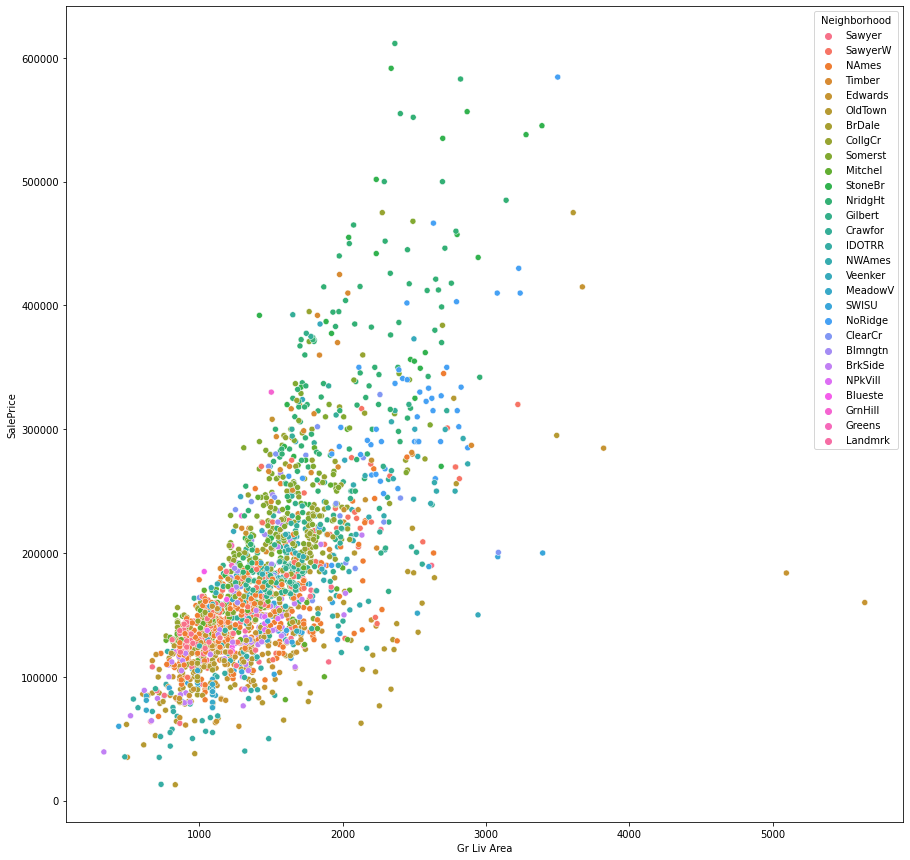

In [99]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df,x='Gr Liv Area', y='SalePrice', hue='Neighborhood')

Even when plotting the Gross Living Area against Sale Price, we do not see a very clear trend.

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

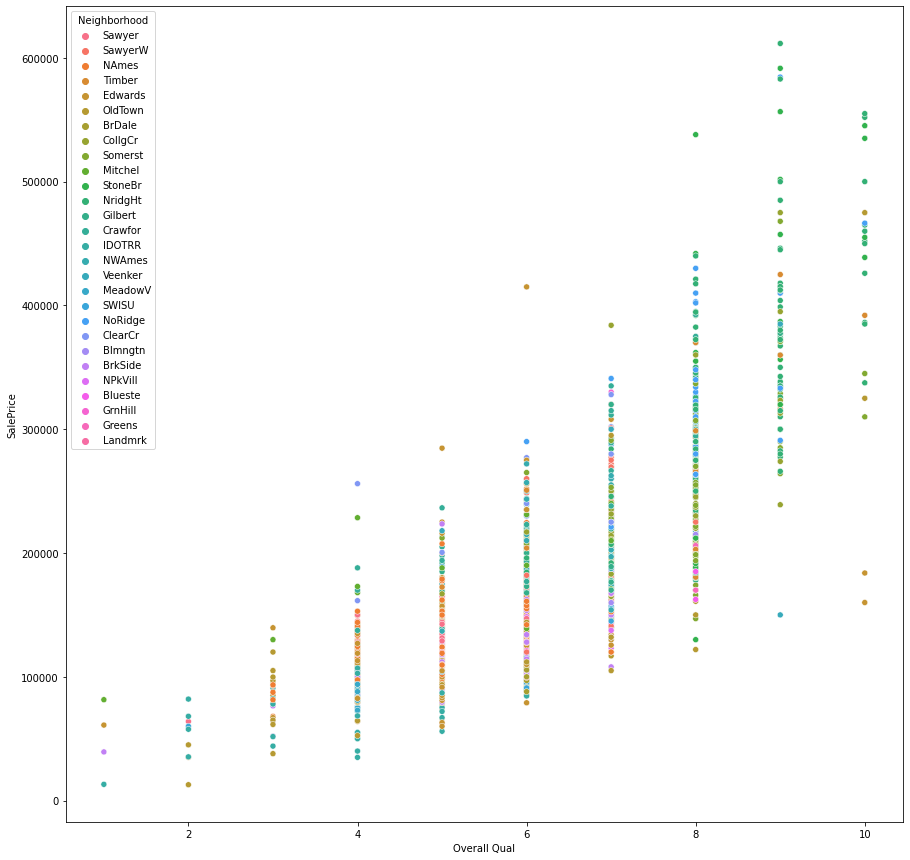

In [100]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df,x='Overall Qual', y='SalePrice', hue='Neighborhood')

Likewise, a plot of price against overall quality does not show any patterns between neighborhoods.

<AxesSubplot:title={'center':'Boxplot of Neighborhood Overall Quality'}, xlabel='Neighborhood', ylabel='Overall Qual'>

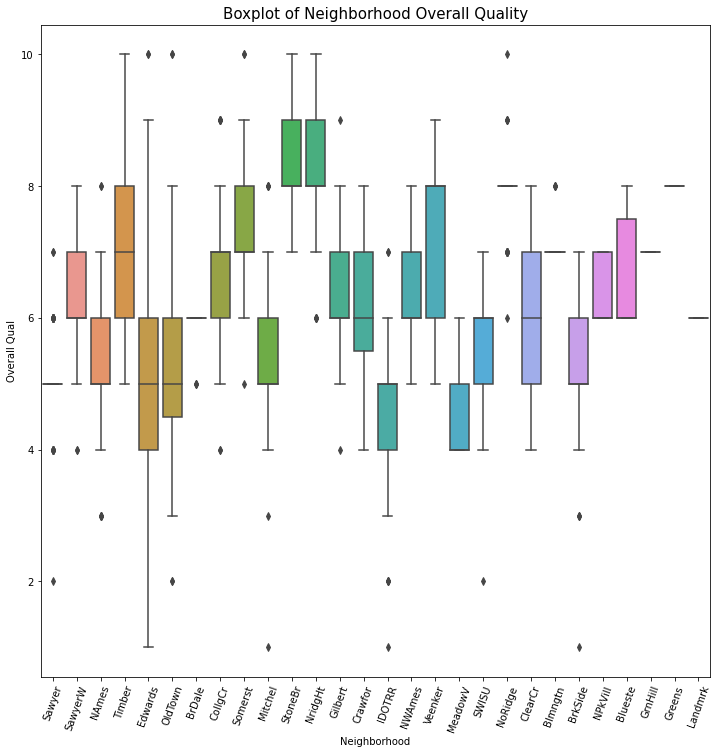

In [101]:
plt.figure(figsize=(12,12))
plt.title('Boxplot of Neighborhood Overall Quality', fontsize=15)
plt.xticks(rotation=70)
sns.boxplot(x='Neighborhood', y='Overall Qual', data=df)
# plt.savefig('../img/nh_quality_boxplot.png')

There is a stronger pattern of segmentation than in the scatterplot. The outliers are explainable as in every neighborhood there are bound to be some houses that are poorly finished. However, this also is the samer reason that using overall quality alone to segnment has its drawbacks.

<AxesSubplot:title={'center':'Boxplot of Neighborhood Prices'}, xlabel='Neighborhood', ylabel='SalePrice'>

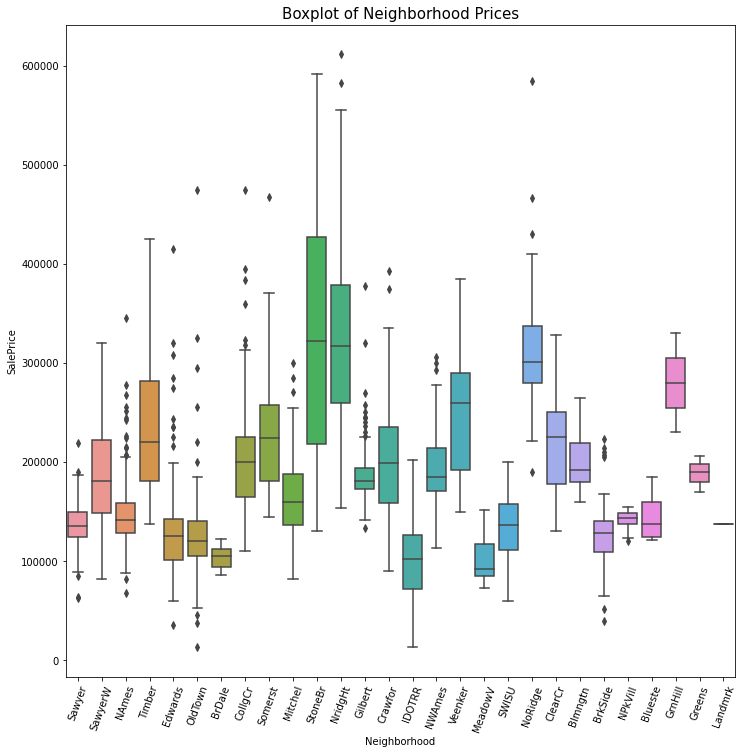

In [102]:
plt.figure(figsize=(12,12))
plt.title('Boxplot of Neighborhood Prices', fontsize=15)
plt.xticks(rotation=70)
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)

The boxplots provides a clearer picture of how to segment the neighborhoods. However, the boxplot on price may be misleading as there could be neighborhoods with many large houses that are cheaper per square feet.

To do more analysis, the neighborhood data will be isolated with some variables of interest so we can experiement with the data and look out for patterns without worrying about altering the main dataset.

In [103]:
nbdf = df[['Neighborhood', 'Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'SalePrice']]

It makes sense to create a new feature to look at the total area (above and below ground).

It also makese sense to then go and compute the price per square feet (psf) based on this total area. The psf price will be calculated based on Gr Liv Area only also. Experimenting with more features will give more options to discover patterns.

In [104]:
nbdf['Total Area'] = nbdf['Gr Liv Area'] + nbdf['Total Bsmt SF']

<ipython-input-104-c746eb5d42c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbdf['Total Area'] = nbdf['Gr Liv Area'] + nbdf['Total Bsmt SF']


In [105]:
nbdf['Gr PSF'] = nbdf['SalePrice'] / nbdf['Gr Liv Area'] 

<ipython-input-105-69dc3cf39368>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbdf['Gr PSF'] = nbdf['SalePrice'] / nbdf['Gr Liv Area']


In [106]:
nbdf['Total PSF'] = nbdf['SalePrice'] / nbdf['Total Area']

<ipython-input-106-49c0d7065496>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbdf['Total PSF'] = nbdf['SalePrice'] / nbdf['Total Area']


<AxesSubplot:xlabel='Total PSF', ylabel='Gr PSF'>

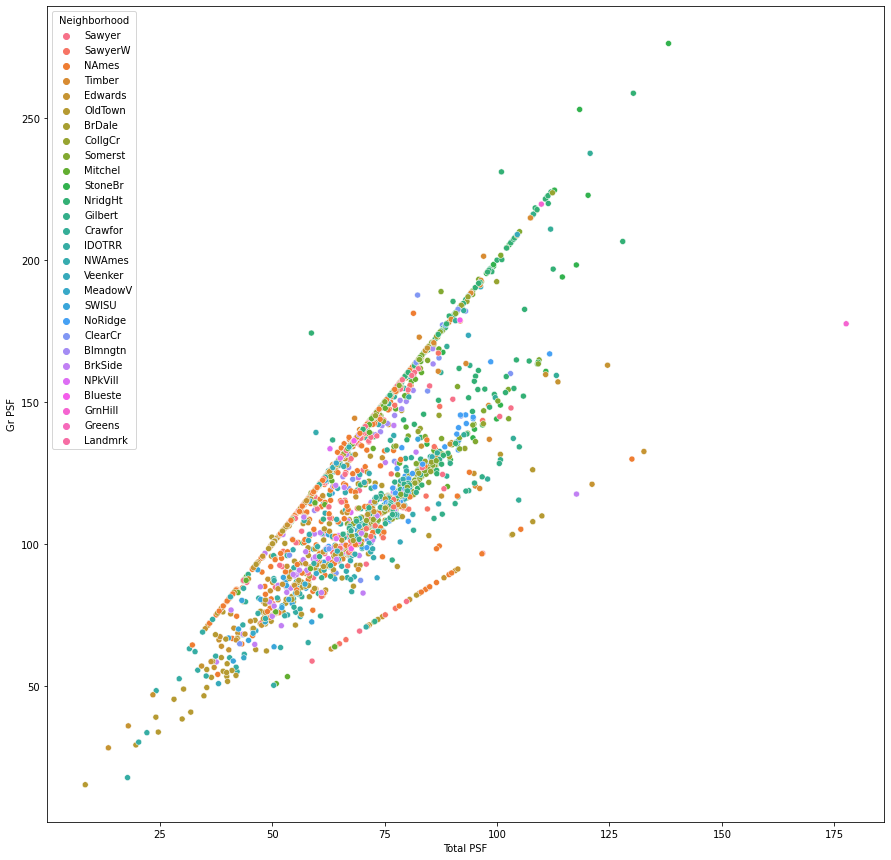

In [107]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=nbdf,x='Total PSF', y='Gr PSF', hue='Neighborhood')

The data is starting to show a bit more of a clearer pattern. But there are still too many points to visualise any meaningul cluster. It will make more sense to cluster the neighborhoods by their average total psf price and overall quality, and also to visualsie them on less correlated variables like (Gr PSF and Total PSF) as above.

<AxesSubplot:title={'center':'Boxplot of Neighborhood Total PSF'}, xlabel='Neighborhood', ylabel='Total PSF'>

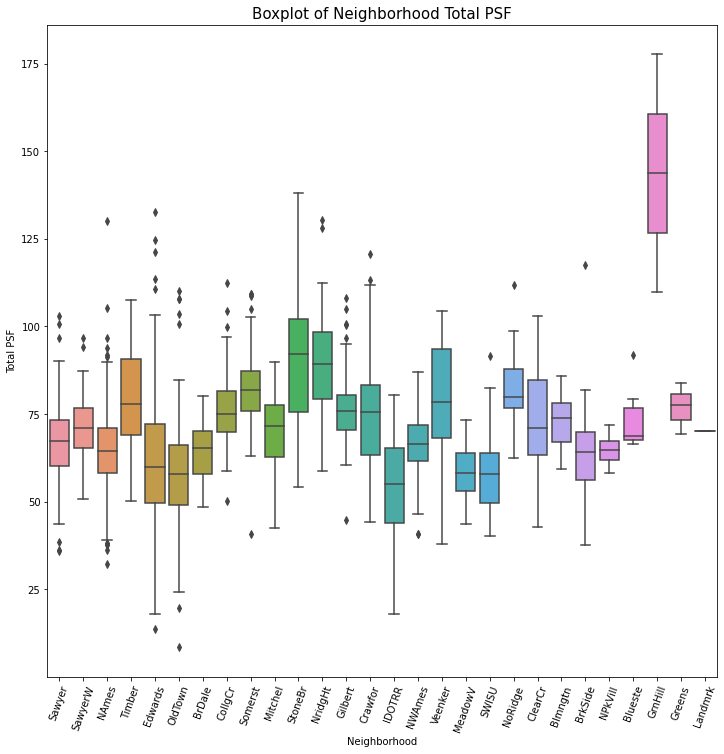

In [108]:
plt.figure(figsize=(12,12))
plt.title('Boxplot of Neighborhood Total PSF', fontsize=15)
plt.xticks(rotation=70)
sns.boxplot(x='Neighborhood', y='Total PSF', data=nbdf)

Now, a more fair metric is used. Although the segmentation seems less obvious than when purely based on sale price or solely on quality, there is still some segmentable pattern and now, we also see how GrenHill stands out.

In [109]:
nb_grp_df = nbdf.groupby('Neighborhood').mean()[['Total PSF', 'Overall Qual']]

In [110]:
nb_grp_df

Total PSF  Overall Qual
Neighborhood                          
Blmngtn        72.788823      7.181818
Blueste        73.781805      6.666667
BrDale         64.906608      5.842105
BrkSide        63.504637      5.210526
ClearCr        73.187014      6.037037
CollgCr        76.011194      6.683333
Crawfor        75.453408      6.253521
Edwards        62.333906      5.104895
Gilbert        76.561647      6.474138
Greens         76.943991      8.000000
GrnHill       143.729853      7.000000
IDOTRR         53.804561      4.579710
Landmrk        70.256410      6.000000
MeadowV        58.286898      4.458333
Mitchel        69.651550      5.597561
NAmes          64.669572      5.332258
NPkVill        64.401077      6.294118
NWAmes         66.180836      6.390805
NoRidge        81.867834      7.875000
NridgHt        89.115994      8.278689
OldTown        57.780699      5.239264
SWISU          58.228728      5.593750
Sawyer         67.247192      5.072072
SawyerW        71.090373      6.390805
Somerst        82.287915      7.430769
StoneBr        91.195760      8.447368
Timber         79.561931      7.208333
Veenker        78.905646      7.352941

In [111]:
nbdf[nbdf['Neighborhood'] == 'GrnHill']

Neighborhood  Overall Qual  Gr Liv Area  Total Bsmt SF  SalePrice  \
463       GrnHill             7         1502         1502.0     330000   
1211      GrnHill             7         1295            0.0     230000   

      Total Area      Gr PSF   Total PSF  
463       3004.0  219.707057  109.853529  
1211      1295.0  177.606178  177.606178

GrnHill seems like and outlier.

<AxesSubplot:xlabel='Total PSF', ylabel='Overall Qual'>

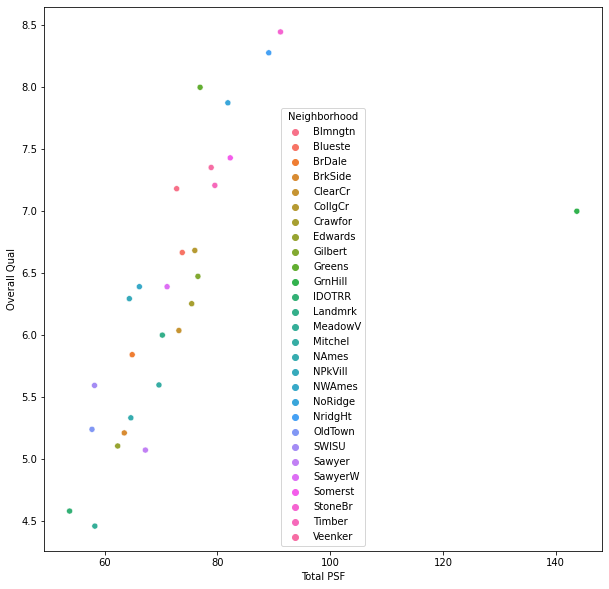

In [112]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = nb_grp_df,
                x = 'Total PSF',
                y = 'Overall Qual',
                hue= 'Neighborhood')

A clearer pattern emerges, though the GrnHill outlier skews the visualisation.

Text(0.5, 1.0, 'Mean Per Square Foot Price \n vs Mean Overall Quality by Neighborhood')

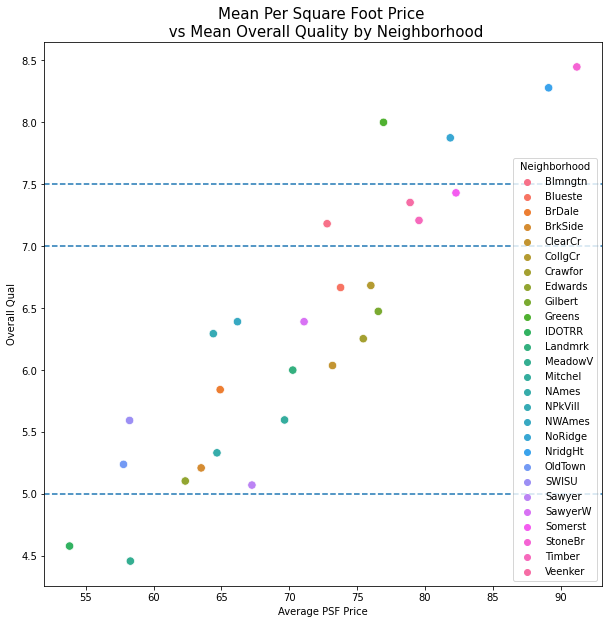

In [113]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = nb_grp_df.drop('GrnHill', axis=0),
                x = 'Total PSF',
                y = 'Overall Qual',
                hue= 'Neighborhood',
               s=70)
plt.xlabel('Average PSF Price')
plt.axhline(5, linestyle='--')
plt.axhline(7, linestyle='--')
plt.axhline(7.5, linestyle='--')
plt.title('Mean Per Square Foot Price \n vs Mean Overall Quality by Neighborhood', fontsize=15)
# plt.savefig('../img/nh_segments.png')

The visualisation without GrnHill shows a clearer pattern. Now some sensible segmentation of our neighborhoods appear. Compared to the boxplot above, this is based on considering three key factors effectively (quality, price and area). 

The segmentation will be be based on Overall Qual thresholds, which in this case appears to have a strong correlation with Total PSF. The segmentation thresholds will be chosen at amounts that are consistent as possible with how they are separated by ranges of PSF values.

In [114]:
nb_grp_df[nb_grp_df['Overall Qual'] < 5].index

Index(['IDOTRR', 'MeadowV'], dtype='object', name='Neighborhood')

In [115]:
nb_grp_df[(nb_grp_df['Overall Qual'] > 5.0)&(nb_grp_df['Overall Qual'] <= 7.0)].index

Index(['Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'GrnHill', 'Landmrk', 'Mitchel', 'NAmes',
       'NPkVill', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW'],
      dtype='object', name='Neighborhood')

In [116]:
len(nb_grp_df[(nb_grp_df['Overall Qual'] > 5.0)&(nb_grp_df['Overall Qual'] <= 7.0)].index)

18

In [117]:
nb_grp_df[(nb_grp_df['Overall Qual'] > 7.0)&(nb_grp_df['Overall Qual'] < 7.5)].index

Index(['Blmngtn', 'Somerst', 'Timber', 'Veenker'], dtype='object', name='Neighborhood')

In [118]:
nb_grp_df[nb_grp_df['Overall Qual'] > 7.5].index

Index(['Greens', 'NoRidge', 'NridgHt', 'StoneBr'], dtype='object', name='Neighborhood')

In [119]:
len(nb_grp_df.index)

28

Four classes of neighborhoods are identified based on their price PSF and overall quality, which sensibly characterises neighborhoods, as more expensive neighborhoods cost more ono average comparing square feet to square feet, and wealthier neighborhoods will likely have more high quality finished houses. We  have a fifth separate class to house the outlier of the GrnHill neighborhood.

In [120]:
NH1 = list(nb_grp_df[nb_grp_df['Overall Qual'] < 5].index)
NH2 = list(nb_grp_df[(nb_grp_df['Overall Qual'] > 5.0)&(nb_grp_df['Overall Qual'] <= 7.0)].index)
NH3 = list(nb_grp_df[(nb_grp_df['Overall Qual'] > 7.0)&(nb_grp_df['Overall Qual'] < 7.5)].index)
NH4 = list(nb_grp_df[nb_grp_df['Overall Qual'] > 7.5].index)

In [121]:
NH2.remove('GrnHill')

In [122]:
NH2

['Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'Landmrk',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW']

In [123]:
NH_dict = {
    'GrnHill': ['GrnHill'],
    'NH1': NH1,
    'NH2': NH2,
    'NH3': NH3,
    'NH4': NH4
}

In [124]:
NH_dict

{'GrnHill': ['GrnHill'],
 'NH1': ['IDOTRR', 'MeadowV'],
 'NH2': ['Blueste',
  'BrDale',
  'BrkSide',
  'ClearCr',
  'CollgCr',
  'Crawfor',
  'Edwards',
  'Gilbert',
  'Landmrk',
  'Mitchel',
  'NAmes',
  'NPkVill',
  'NWAmes',
  'OldTown',
  'SWISU',
  'Sawyer',
  'SawyerW'],
 'NH3': ['Blmngtn', 'Somerst', 'Timber', 'Veenker'],
 'NH4': ['Greens', 'NoRidge', 'NridgHt', 'StoneBr']}

In [125]:
nom_vars.add('Neighborhood')

#### Continued Analysis of Non Numeric Variables

In [126]:
str_vars[9:15]

['Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl']

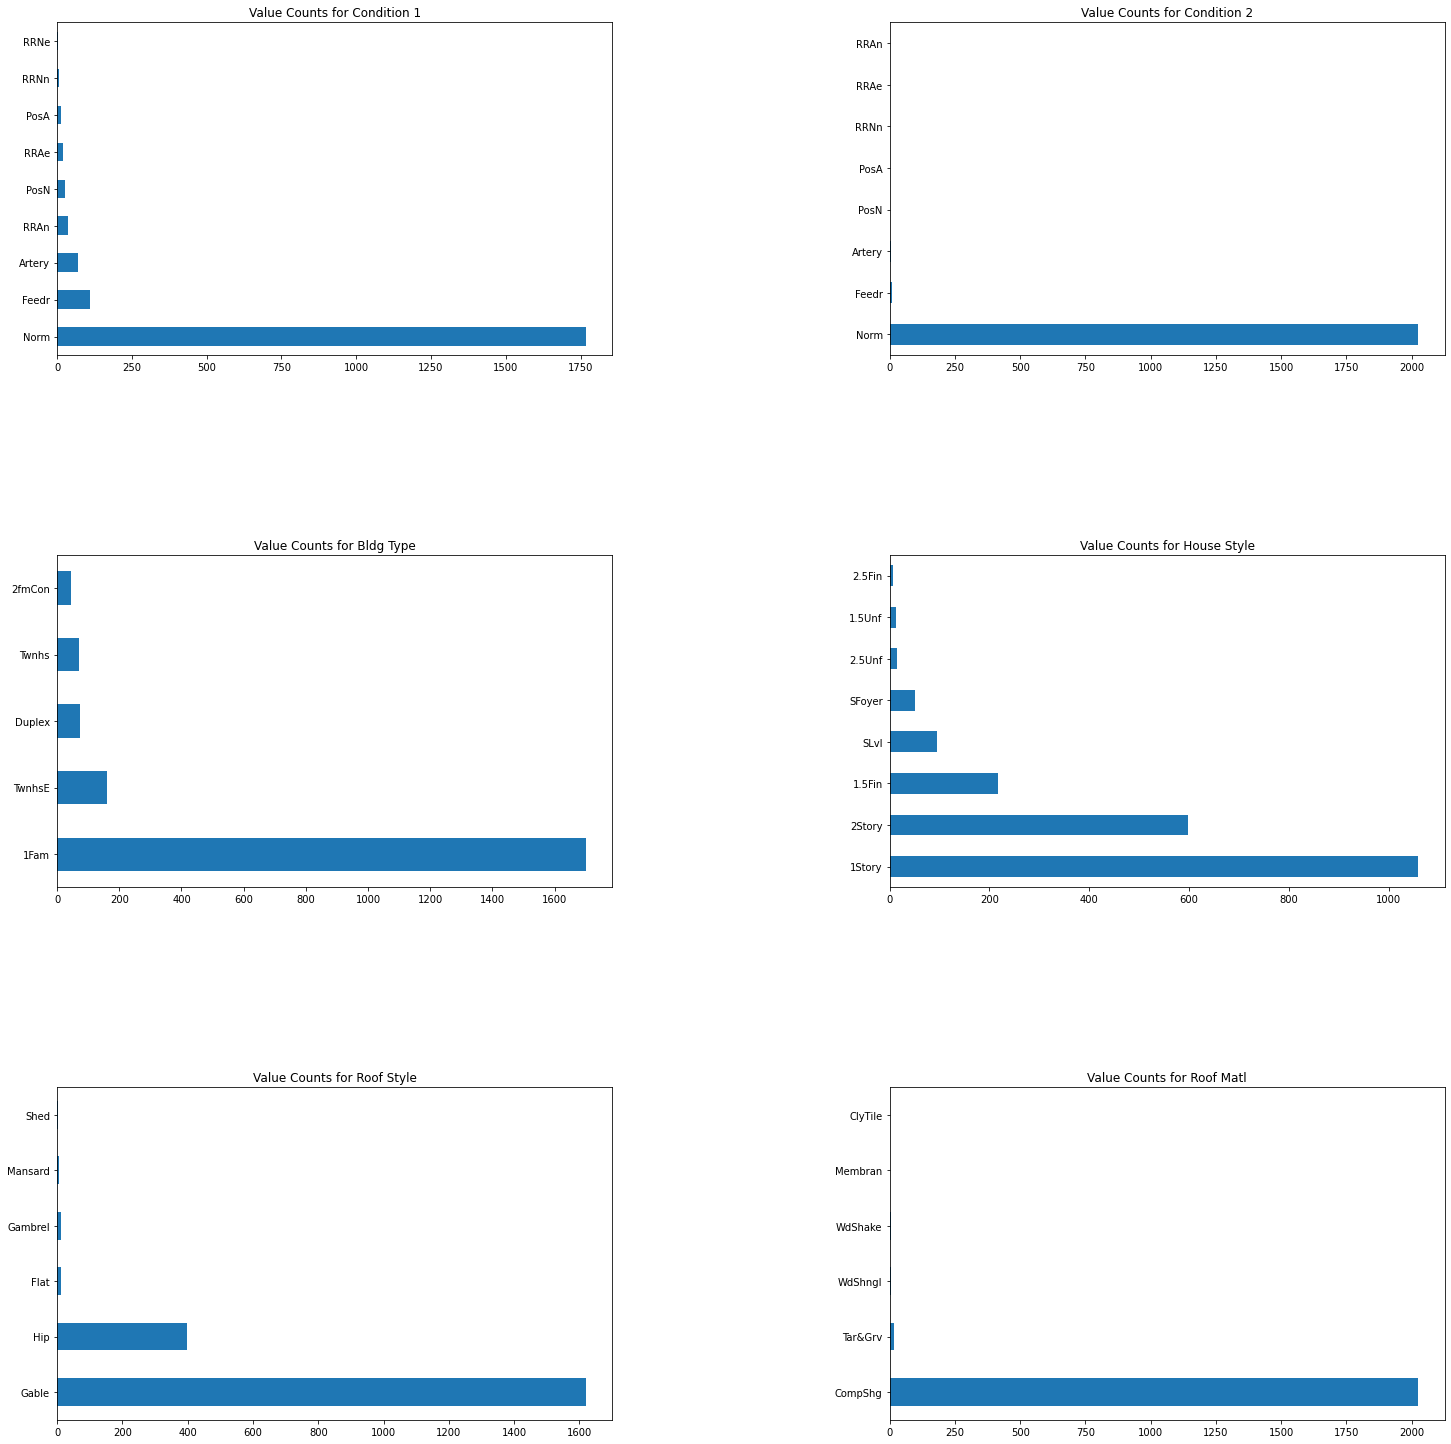

In [127]:
subplot_vc_bars(df, str_vars[9:15])

In [128]:
# this batch is all nominal (even for House Style as not all the categories can be sensibly ordered)
nom_vars = nom_vars.union(str_vars[9:15])

In [129]:
# data for these columns seem very imbalanced and do not provide much useful info

drop_vars = drop_vars.union(['Condition 1',
 'Condition 2',
 'Bldg Type'])

In [130]:
df.groupby('Bldg Type').mean()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

SalePrice
Bldg Type               
TwnhsE     198312.372671
1Fam       185275.685882
Duplex     139296.333333
Twnhs      133100.000000
2fmCon     123179.891304

In [131]:
df.groupby('House Style').mean()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

SalePrice
House Style               
2.5Fin       243666.666667
2Story       206408.963211
2.5Unf       191785.714286
1Story       179809.194523
SLvl         166248.989362
SFoyer       149343.920000
1.5Fin       136480.091743
1.5Unf       112466.666667

For House Style, might make sense to map to one and two stories later on.

In [132]:
df.groupby('Roof Style').mean()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

SalePrice
Roof Style               
Hip         224366.654912
Shed        208666.666667
Flat        191613.076923
Gable       171264.253243
Mansard     152642.857143
Gambrel     138208.333333

In [133]:
df['Roof Style'].value_counts()

Gable      1619
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: Roof Style, dtype: int64

For Roof Style, might make sense to separate into Hip and everything else.

In [134]:
# looks like a useless variable without enough examples per label
drop_vars.add('Roof Matl')

In [135]:
str_vars[15:21]

['Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation']

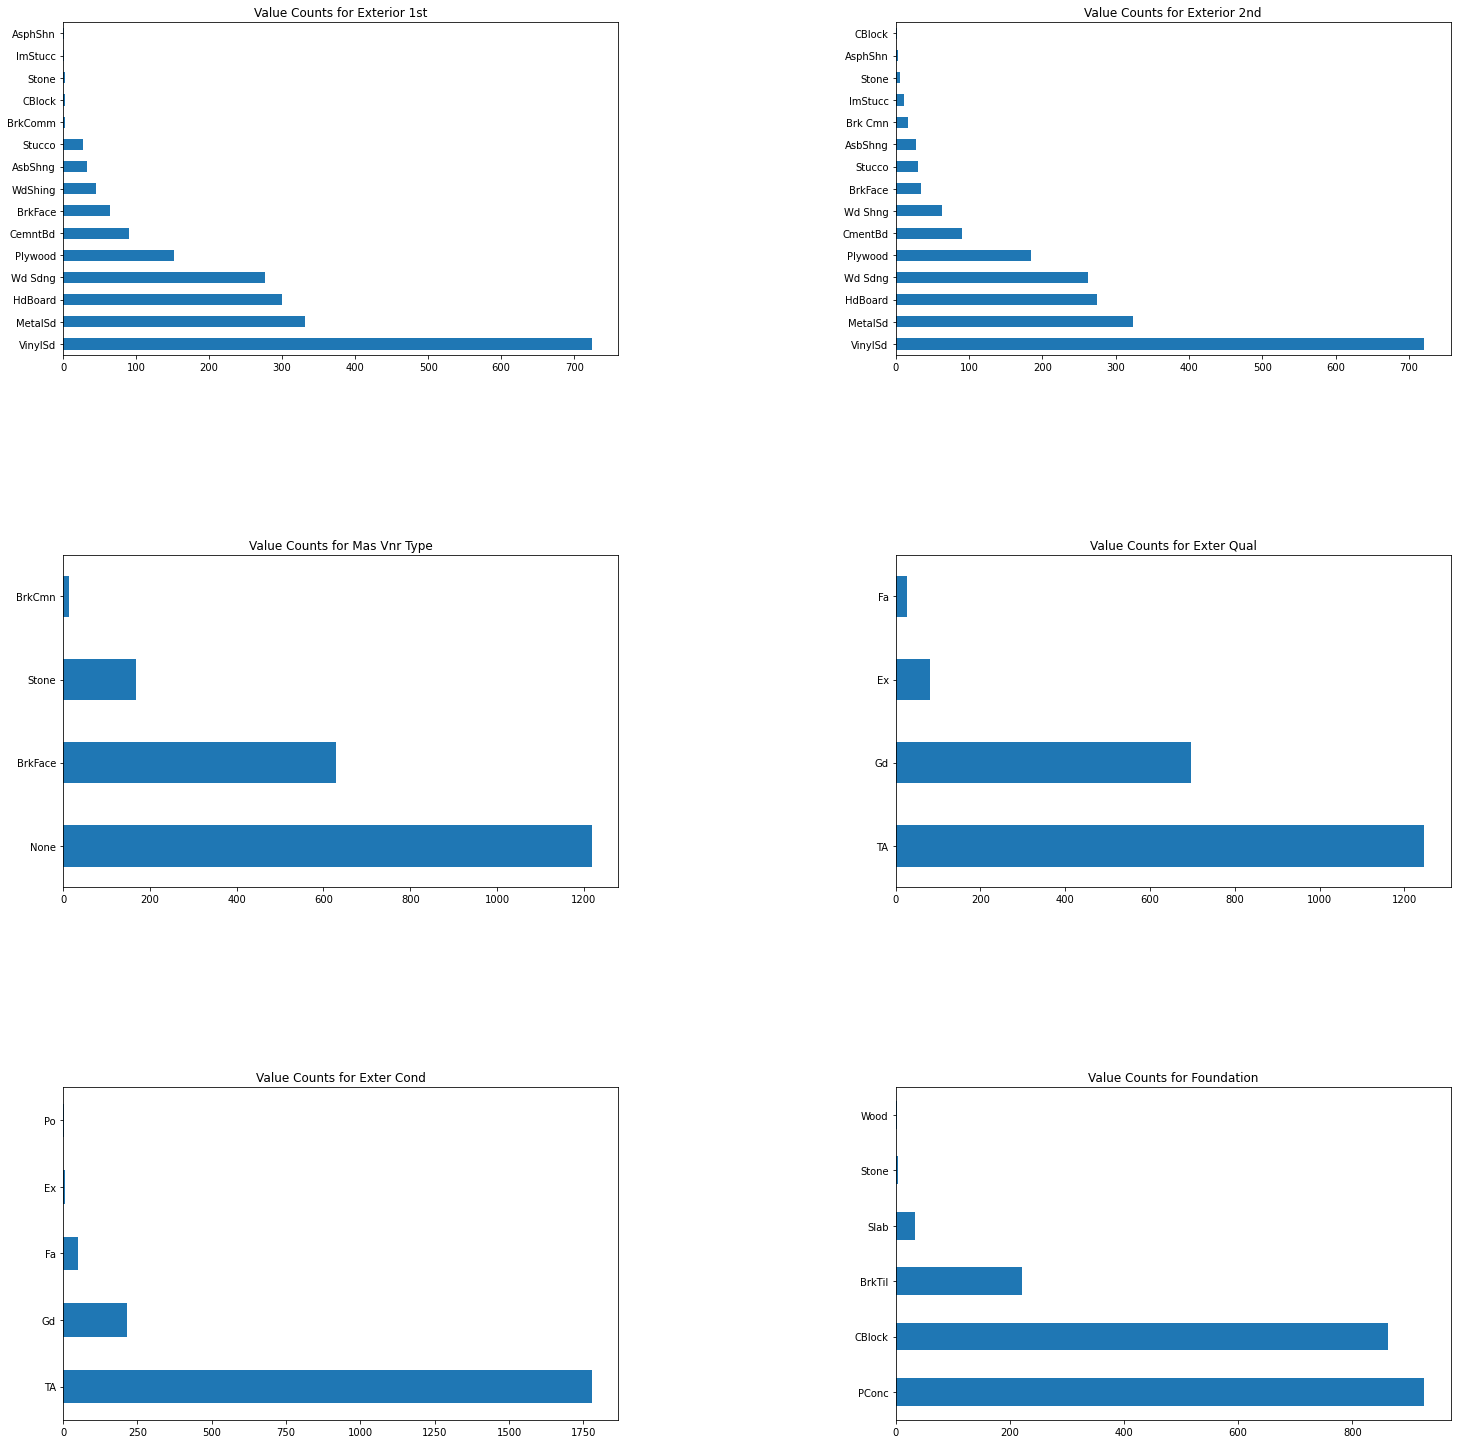

In [136]:
subplot_vc_bars(df, str_vars[15:21])

In [137]:
nom_vars = nom_vars.union(['Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation'])
ord_vars = ord_vars.union(['Exter Qual', 'Exter Cond'])

In [138]:
check_same(str_vars[15:21],
          ['Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation']+['Exter Qual', 'Exter Cond'])

True

In [139]:
df.groupby('Exterior 1st').mean()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

SalePrice
Exterior 1st               
ImStucc       262000.000000
Stone         258500.000000
CemntBd       243429.088889
VinylSd       218174.082873
BrkFace       193055.093750
Plywood       170511.453947
HdBoard       159582.473333
WdShing       155616.822222
MetalSd       154402.048338
Wd Sdng       142940.887681
Stucco        139712.962963
BrkComm       131000.000000
AsbShng       103183.333333
CBlock         93250.000000
AsphShn        82375.000000

In [140]:
df.groupby('Exterior 2nd').mean()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

SalePrice
Exterior 2nd               
CmentBd       239540.200000
ImStucc       227472.727273
VinylSd       217798.685160
BrkFace       187992.647059
Plywood       166485.713514
HdBoard       160836.880000
MetalSd       155978.635802
Wd Shng       154244.444444
Stucco        147725.333333
Wd Sdng       145654.396947
Stone         145420.666667
Brk Cmn       139958.823529
AsphShn       132125.000000
AsbShng       107108.928571
CBlock         92000.000000

In [141]:
# no clear buckets to distinguish, and very unevenly distributed classes, orth dropping
drop_vars = drop_vars.union(['Exterior 1st', 'Exterior 2nd'])

In [142]:
df.groupby('Mas Vnr Type').median()['SalePrice']

Mas Vnr Type
BrkCmn     139000.0
BrkFace    188700.0
None       143000.0
Stone      247164.0
Name: SalePrice, dtype: float64

In [143]:
df['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

Consider separating into Stone Vnr, Vnr and None.

In [144]:
df.groupby('Exter Qual').mean()['SalePrice']

Exter Qual
Ex    374460.308642
Fa     89801.192308
Gd    230802.484935
TA    143270.978348
Name: SalePrice, dtype: float64

In [145]:
df['Exter Qual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

Convert 'Exter Qual' to scale of 0-2, 0 for Fa/Po, 1 for TA, 2 for Gd/Ex. 

In [146]:
df.groupby('Exter Cond').mean()['SalePrice']

Exter Cond
Ex    236263.857143
Fa    102507.693878
Gd    167623.023256
Po     44800.000000
TA    185258.202475
Name: SalePrice, dtype: float64

In [147]:
df['Exter Cond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [148]:
# useless feature, large proportion are 'typical/average', 'poor' could be useful but way too little data
drop_vars.add('Exter Cond')

In [149]:
df['Foundation'].value_counts()

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [150]:
df.groupby('Foundation').median()['SalePrice']

Foundation
BrkTil    125500.0
CBlock    140750.0
PConc     209000.0
Slab      102350.0
Stone     118000.0
Wood      173750.0
Name: SalePrice, dtype: float64

Convert this to PConc and everything else.

In [151]:
str_vars[21:26]

['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

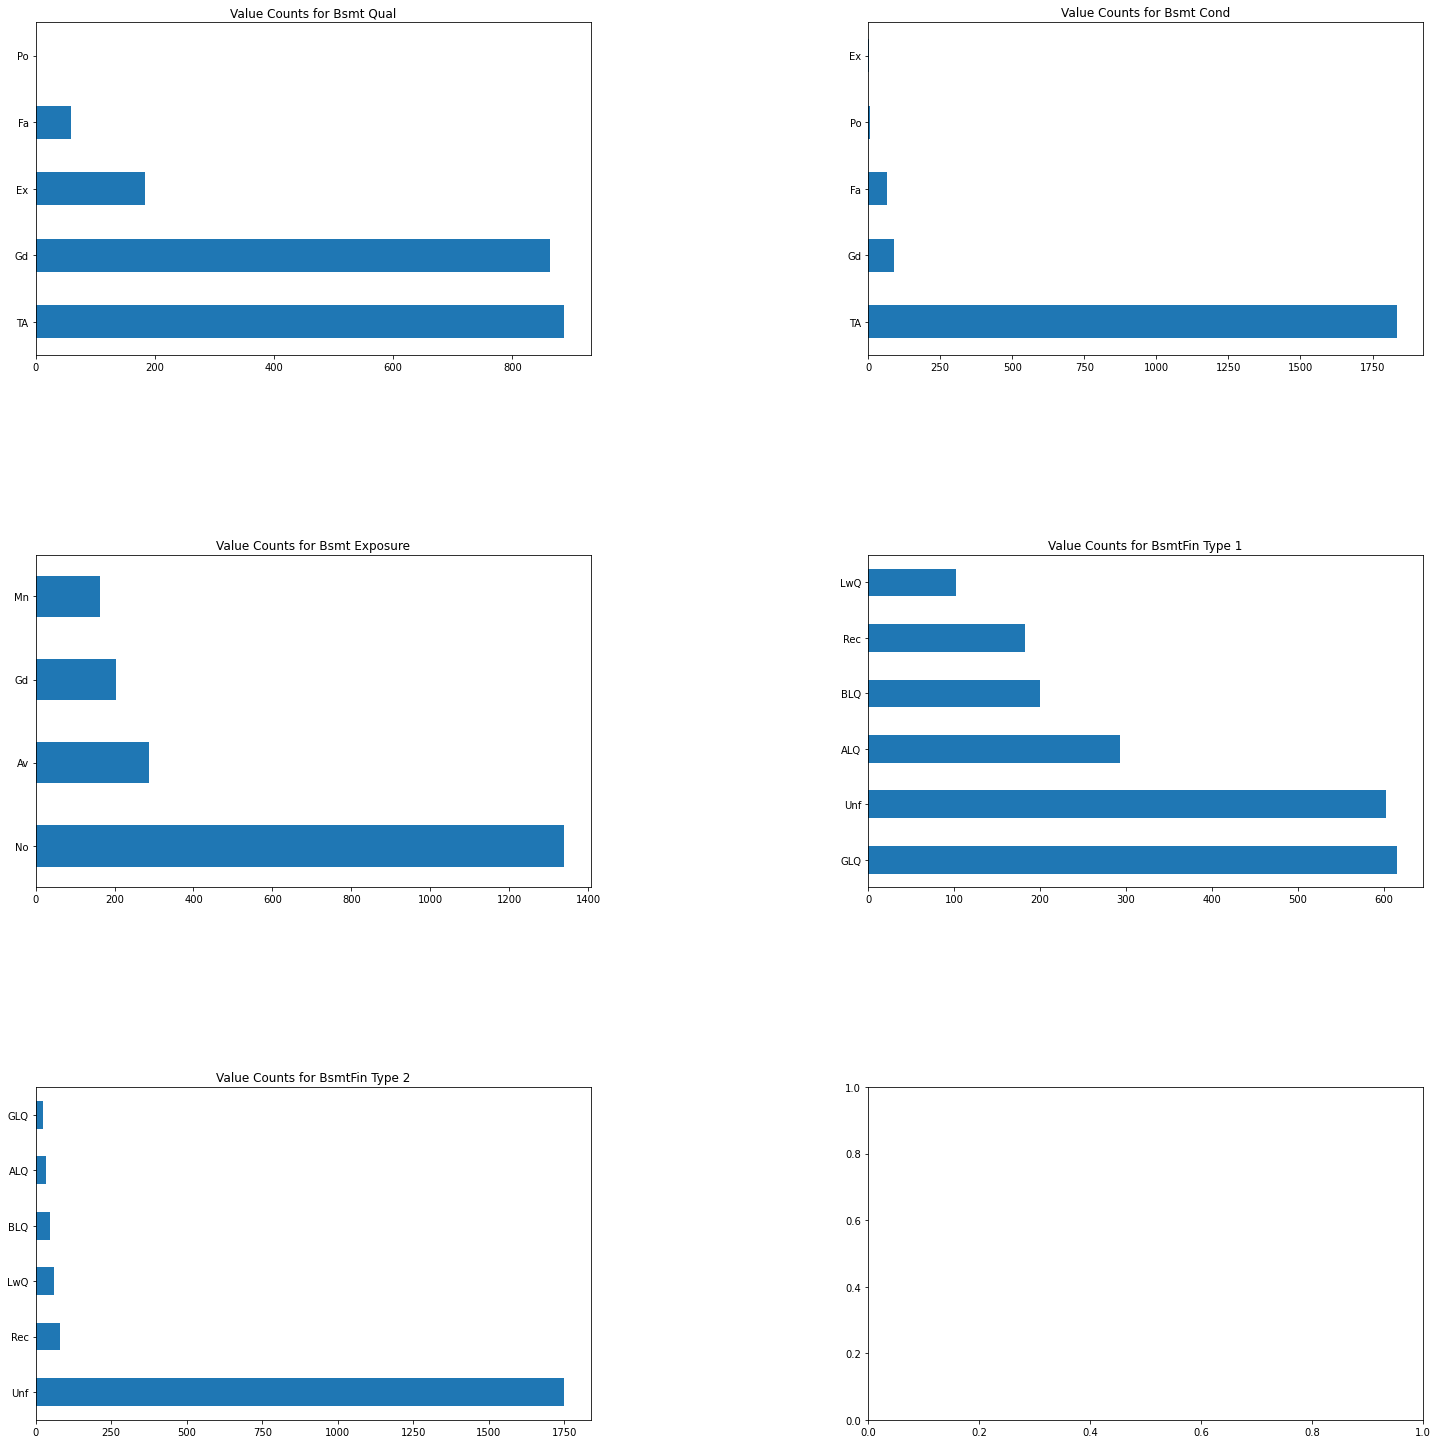

In [152]:
subplot_vc_bars(df, str_vars[21:26])

In [153]:
# all seem to be of ordinal quality
ords_vars = ord_vars.union(str_vars[21:26])

In [154]:
str_vars[21:26]

['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

In [155]:
def vs_sale_price_and_vc(col, df=df):
    """
    For a particular column name, return the mean sale price of each col value.
    Following that, show the value counts of the col.
    """
    print(df.groupby(col).mean()['SalePrice'],
          '\n\n',
          df[col].value_counts())

In [156]:
vs_sale_price_and_vc('Bsmt Qual')

Bsmt Qual
Ex    329506.619565
Fa    107752.166667
Gd    202537.582176
Po     89000.000000
TA    139988.461105
Name: SalePrice, dtype: float64 

 TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64


Convert to scale of 0-2 for Po/Fa/TA, Gd, Ex.

In [157]:
vs_sale_price_and_vc('Bsmt Cond')

Bsmt Cond
Ex    195000.000000
Fa    118629.076923
Gd    223969.550562
Po    124063.200000
TA    184021.858233
Name: SalePrice, dtype: float64 

 TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64


In [158]:
df['Bsmt Cond'].isna().sum()

55

In [159]:
drop_vars = drop_vars.union(str_vars[21:26])

We will consolidate the basement , going too granular on basement features, especially with ordinal quality ranking, might unfairly penalise houses without basements.

In [160]:
str_vars[26:33]

['Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu']

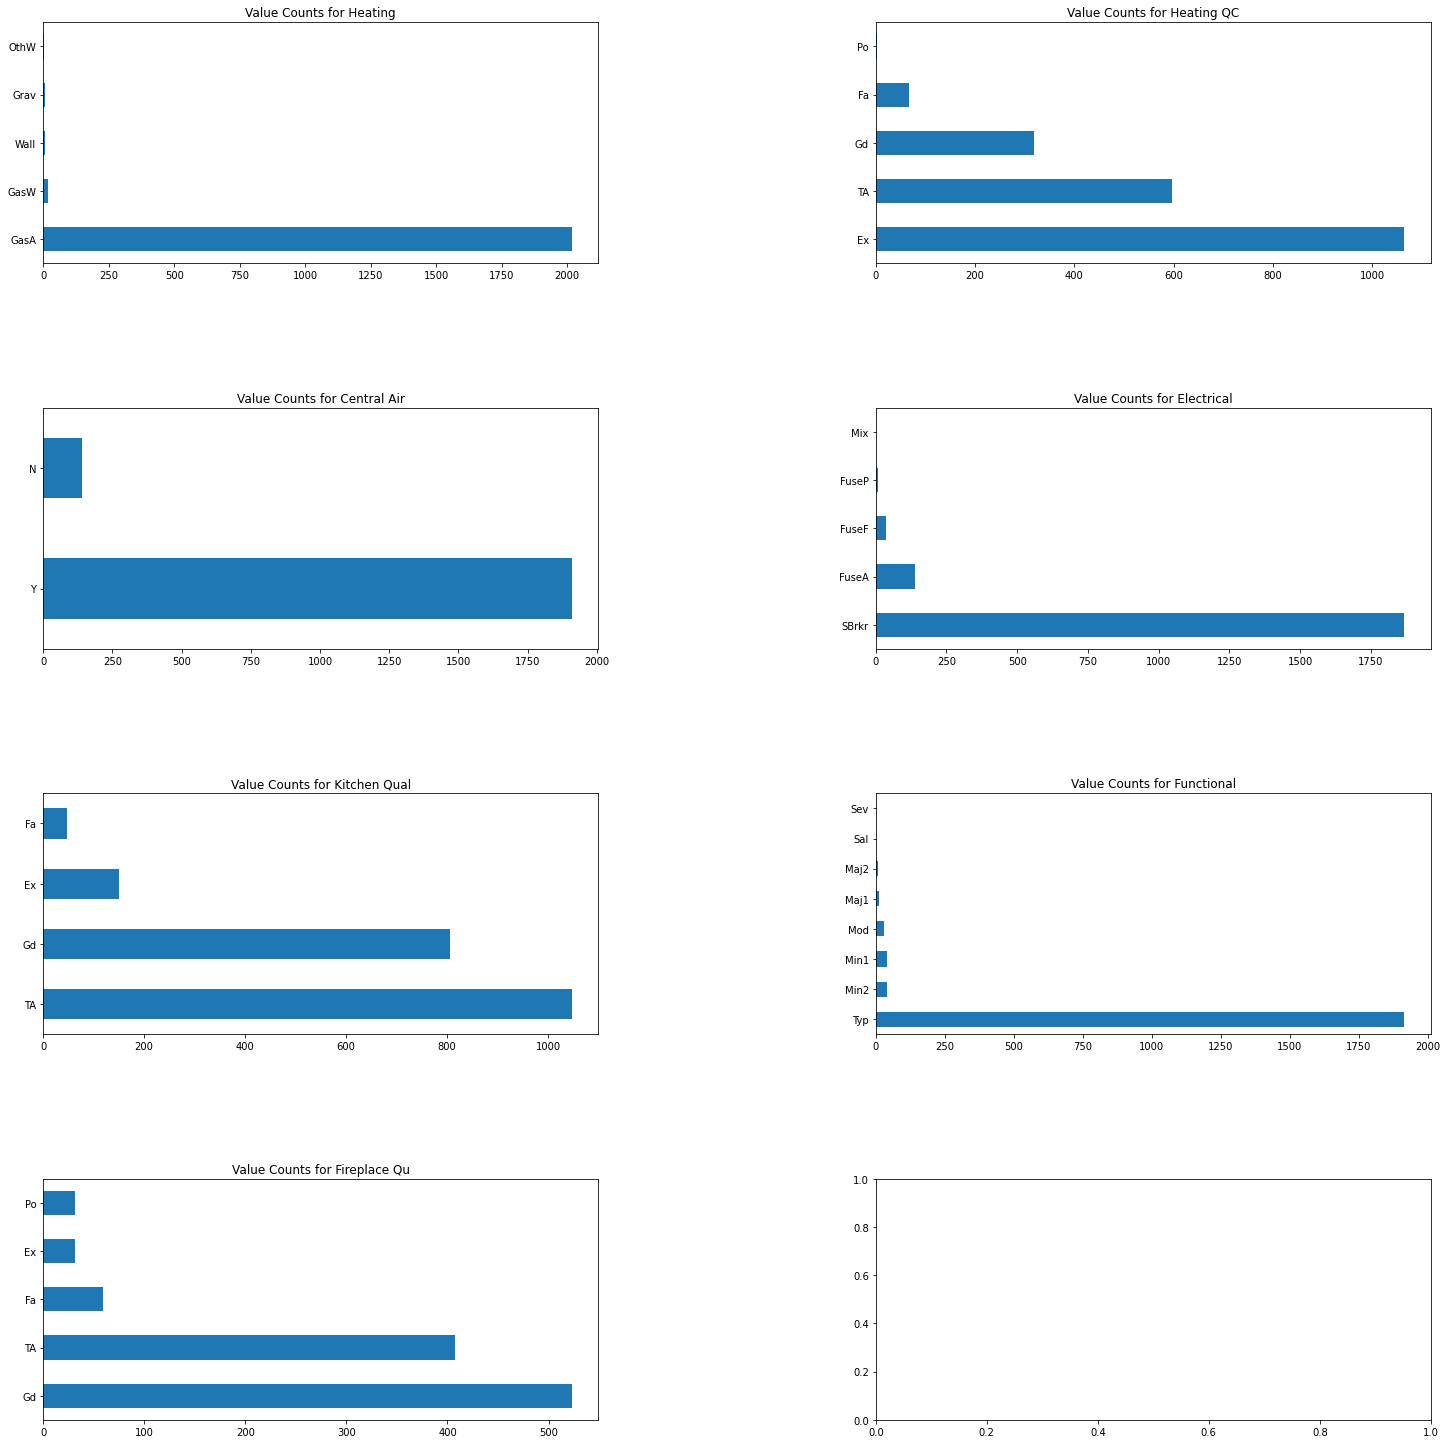

In [161]:
subplot_vc_bars(df, str_vars[26:33])

In [162]:
nom_vars = nom_vars.union(['Heating', 'Electrical'])
ord_vars = ord_vars.union(['Heating QC', 'Kitchen Qual', 'Functional', 'Fireplace Qu'])
bin_vars.add('Central Air')

In [163]:
str_vars[26:33]

['Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu']

In [164]:
drop_vars.add('Heating')

In [165]:
vs_sale_price_and_vc('Heating QC')

Heating QC
Ex    216027.607512
Fa    117123.641791
Gd    160174.009404
Po     69033.333333
TA    138986.705193
Name: SalePrice, dtype: float64 

 Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64


Convert Heating QC to Excellent and everthing else.

In [166]:
vs_sale_price_and_vc('Central Air')

Central Air
N    100575.078014
Y    187441.503665
Name: SalePrice, dtype: float64 

 Y    1910
N     141
Name: Central Air, dtype: int64


In [167]:
df['Central Air'].isna().sum()

0

In [168]:
# variable does not look very helpful, large majority contains one value
drop_vars.add('Electrical')

In [169]:
vs_sale_price_and_vc('Kitchen Qual')

Kitchen Qual
Ex    336424.463576
Fa    101334.957447
Gd    211629.451613
TA    139501.607450
Name: SalePrice, dtype: float64 

 TA    1047
Gd     806
Ex     151
Fa      47
Name: Kitchen Qual, dtype: int64


In [170]:
df['Kitchen Qual'].isna().sum()

0

Convert Kitchen Qual to 0-2, Ex(2), Gd(1), everything else (0).

In [171]:
# see plot above, large majority contains one value
drop_vars.add('Functional')

In [172]:
vs_sale_price_and_vc('Fireplace Qu')

Fireplace Qu
Ex    331481.483871
Fa    170287.203390
Gd    233578.388145
Po    139263.967742
TA    204893.621622
Name: SalePrice, dtype: float64 

 Gd    523
TA    407
Fa     59
Ex     31
Po     31
Name: Fireplace Qu, dtype: int64


In [173]:
df['Fireplace Qu'].isna().sum()

1000

Convert Fireplace Qual to 0-2, Ex(2), Gd(1), everything else (0).

In [174]:
str_vars[33:42]

['Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

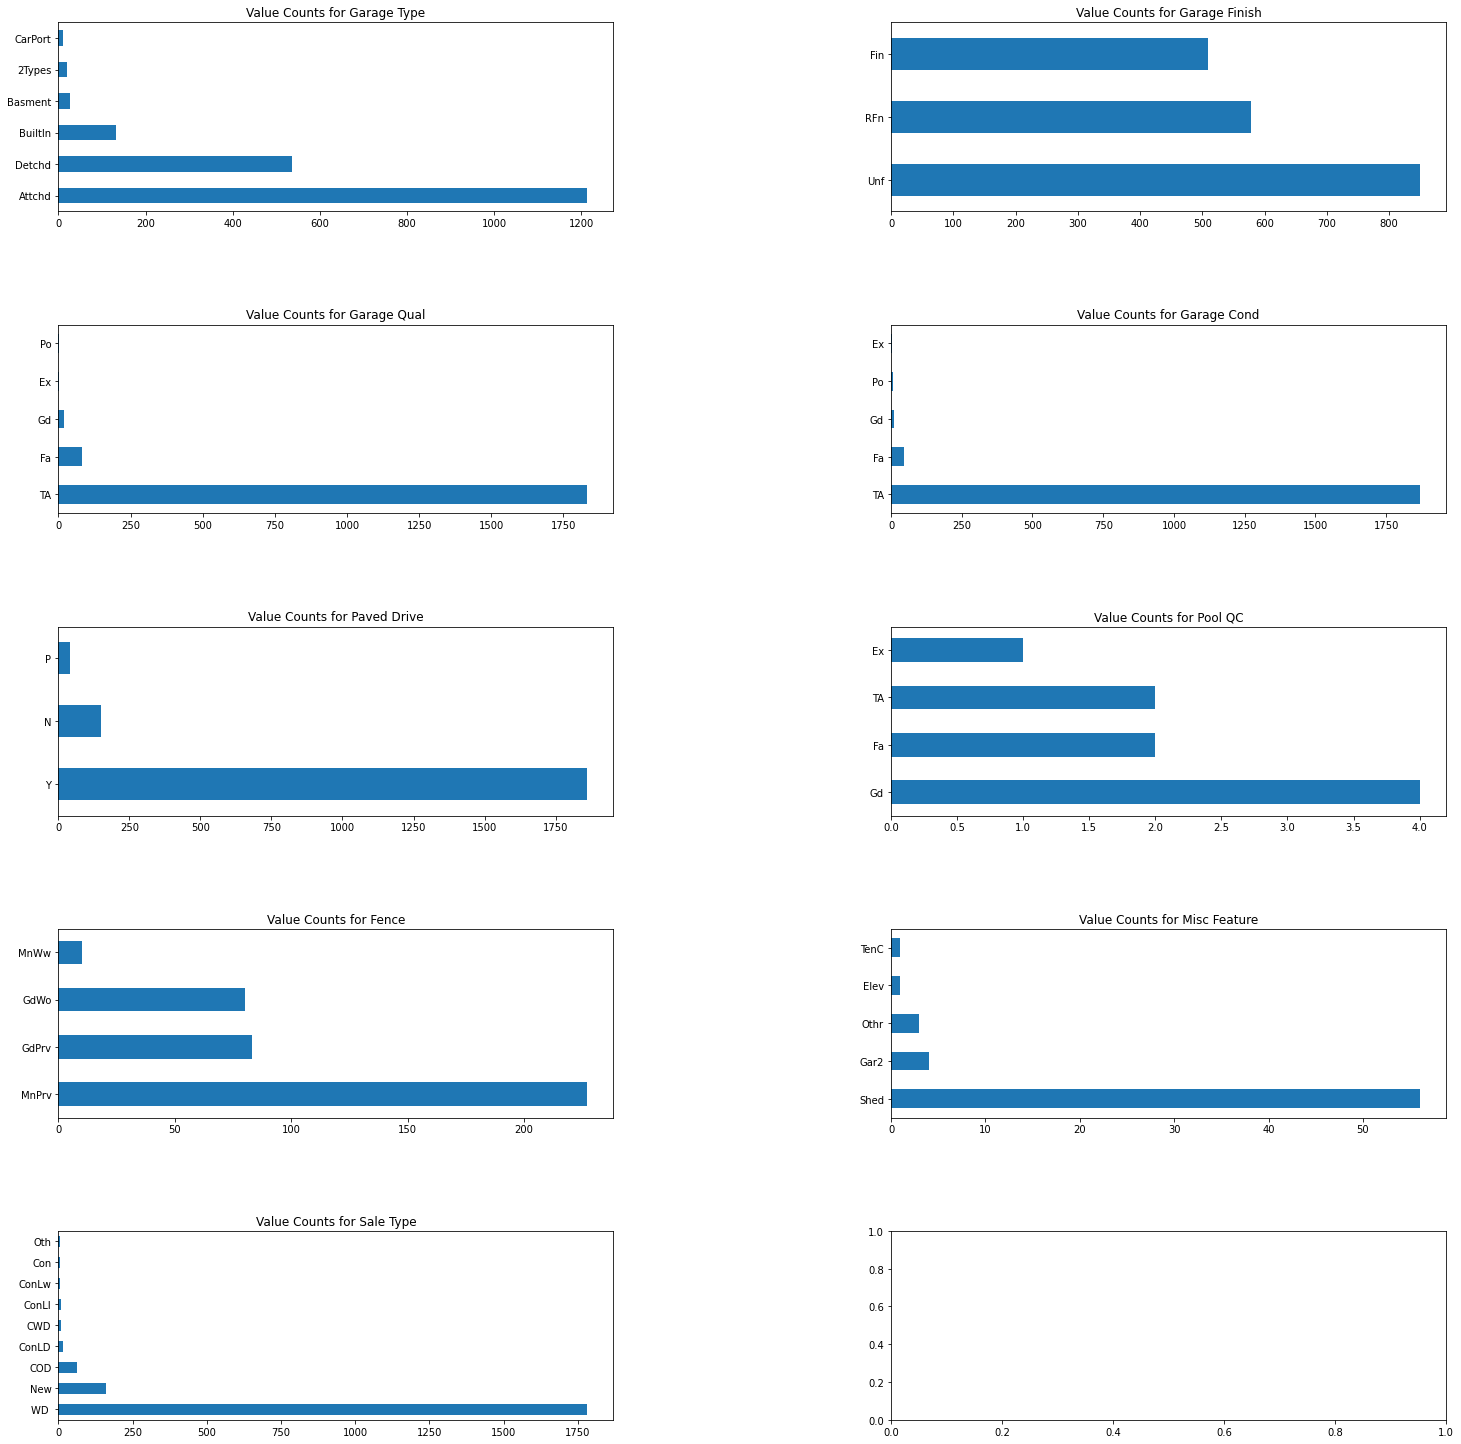

In [175]:
subplot_vc_bars(df, str_vars[33:42])

In [176]:
 str_vars[33:42]

['Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

In [177]:
nom_vars = nom_vars.union(['Garage Type', 'Paved Drive', 'Misc Feature', 'Sale Type'])
ord_vars = ord_vars.union(['Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence'])

In [178]:
vs_sale_price_and_vc('Garage Type')

Garage Type
2Types     157184.210526
Attchd     205040.195383
Basment    143242.333333
BuiltIn    247883.522727
CarPort    103823.545455
Detchd     132132.947761
Name: SalePrice, dtype: float64 

 Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64


Convert Garage Type to Built-In/Attached and everything else.

In [179]:
vs_sale_price_and_vc('Garage Finish')

Garage Finish
Fin    239800.664047
RFn    204792.036269
Unf    140718.148410
Name: SalePrice, dtype: float64 

 Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64


In [180]:
df['Garage Finish'].isna().sum()

114

Convert Garage Finish to Finished (Fin & Rfn) and everthing else (Unf & None).

In [181]:
drop_vars = drop_vars.union(['Garage Qual', 'Garage Cond'])

Garage Qual and Cond do not look like useful distributed variables. Large majority of values are just typical/average.

In [182]:
vs_sale_price_and_vc('Paved Drive')

Paved Drive
N    104562.827815
P    129824.461538
Y    188792.163890
Name: SalePrice, dtype: float64 

 Y    1861
N     151
P      39
Name: Paved Drive, dtype: int64


In [183]:
df['Paved Drive'].isna().sum()

0

Convert this to paved (1) for Y and 0 for everthing else.

In [184]:
vs_sale_price_and_vc('Pool QC')

Pool QC
Ex    315000.0
Fa    215500.0
Gd    216492.5
TA    141500.0
Name: SalePrice, dtype: float64 

 Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64


Pool QC has too little data points to be useful and is likely to granular a feature. Drop it.

In [185]:
drop_vars.add('Pool QC')

In [186]:
vs_sale_price_and_vc('Fence')

Fence
GdPrv    176979.855422
GdWo     141499.162500
MnPrv    147677.969163
MnWw     135165.000000
Name: SalePrice, dtype: float64 

 MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64


In [187]:
df['Fence'].isna().sum()

1651

In [188]:
df[df['Fence'].isna()]['SalePrice'].mean()

188558.7813446396

In [189]:
df[df['Fence'].isna()]['SalePrice'].median()

172500.0

Does not really seem to be a price difference between properties with fences or not, and a large amount of them do not have a value for 'Fence'. Drop it.

In [190]:
drop_vars.add('Fence')

In [191]:
df['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

In [192]:
df.groupby('Misc Feature').mean()['SalePrice']

Misc Feature
Elev    183850.000000
Gar2    146500.000000
Othr    163166.666667
Shed    159042.732143
TenC    250000.000000
Name: SalePrice, dtype: float64

In [193]:
df['SalePrice'].mean()

181469.70160897123

In [194]:
df['SalePrice'].median()

162500.0

The Misc Feature values are too sparse to be useful. Tennis Court would be a good indicator but there is only one example for that. The most frequent value, Shed, does not really seem to have much of an effect versus the median or mean sales price.

We should drop this column.

In [195]:
drop_vars.add('Misc Feature')

In [196]:
df['Sale Type'].value_counts()

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: Sale Type, dtype: int64

In [197]:
df.groupby('Sale Type').mean()['SalePrice']

Sale Type
COD      133574.523810
CWD      186635.000000
Con      241807.500000
ConLD    129091.352941
ConLI    207992.857143
ConLw    124600.000000
New      279021.056250
Oth      127497.750000
WD       174912.251544
Name: SalePrice, dtype: float64

<AxesSubplot:ylabel='Sale Type'>

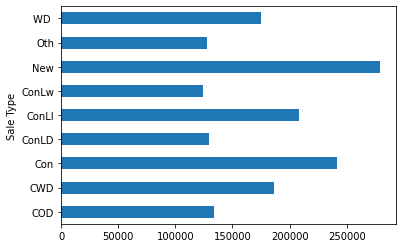

In [198]:
df.groupby('Sale Type').mean()['SalePrice'].plot(kind='barh')

<AxesSubplot:ylabel='Sale Type'>

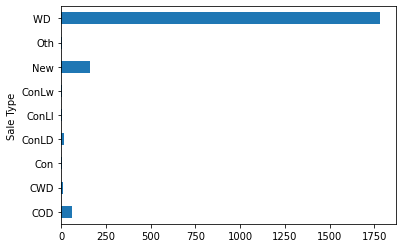

In [199]:
df.groupby('Sale Type').count()['SalePrice'].plot(kind='barh')

Convert 'Sale Type' to 'New Sale' (1) and everthing else (0).

In [200]:
drop_vars

{'Bldg Type',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Qual',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Condition 1',
 'Condition 2',
 'Electrical',
 'Exter Cond',
 'Exterior 1st',
 'Exterior 2nd',
 'Fence',
 'Functional',
 'Garage Cond',
 'Garage Qual',
 'Garage Yr Blt',
 'Heating',
 'Id',
 'Land Slope',
 'MS SubClass',
 'Misc Feature',
 'Pool QC',
 'Roof Matl',
 'Street',
 'Utilities'}

## First Cut of Features

In [201]:
df_c1 = df.drop(columns=drop_vars)

In [202]:
df_c1.shape

(2051, 53)

In [203]:
df.shape

(2051, 81)

More than 20 features cut.

## Impute Missing Values

In [204]:
df_c1.isna().sum()

PID                   0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Alley              1911
Lot Shape             0
Land Contour          0
Lot Config            0
Neighborhood          0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Foundation            0
Bsmt Unf SF           1
Total Bsmt SF         1
Heating QC            0
Central Air           0
1st Flr SF            0
2nd Flr SF            0
Low Qual Fin SF       0
Gr Liv Area           0
Bsmt Full Bath        2
Bsmt Half Bath        2
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
TotRms AbvGrd         0
Fireplaces            0
Fireplace Qu       1000
Garage Type         113
Garage Finish       114
Garage Cars           1
Garage Area           1
Paved Drive     

In [205]:
for i,d in df_c1.isna().sum().iteritems(): 
    if d:
        print(i, '\t', d)

Lot Frontage 	 330
Alley 	 1911
Mas Vnr Type 	 22
Mas Vnr Area 	 22
Bsmt Unf SF 	 1
Total Bsmt SF 	 1
Bsmt Full Bath 	 2
Bsmt Half Bath 	 2
Fireplace Qu 	 1000
Garage Type 	 113
Garage Finish 	 114
Garage Cars 	 1
Garage Area 	 1


In [206]:
df['Lot Frontage'].min(), df['Lot Frontage'].max()

(21.0, 313.0)

In [207]:
df['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [208]:
df['Bsmt Unf SF'].min()

0.0

In [209]:
df['Total Bsmt SF'].min()

0.0

### Impute Approach

<details>
    <summary>Table of Reasons and Approaches</summary>
    
| Variable | missing amount | plausible reason for missing | how to handle missing|
|:-------------------|:---------------------|:-------------------------------|:---------------|
| Lot Frontage|330| no street connected|0|
|Alley|1911|no alley access|'No Access', later encoded |
|Mas Vnr Type|22| no Mas Vnr | 'No Vnr', later encoded |
|Mas Vnr Area|22| no Mas Vnr so area is 0|0|
|Bsmt Unf SF |1|no basement |0|
|Total Bsmt SF|1|no basement |0|
|Bsmt Full Bath|2|no basement bath |0|
|Bsmt Half Bath|2|no basement bath |0|
|Fireplace Qu |1000|no fireplace |'No Fireplace', later encoded|
|Garage Type|113|no garage |'No Garage', later encoded|
|Garage Finish|114|no garage |'No Garage', later encoded|
|Garage Cars|1|no garage |0|
|Garage Area|1|no garage |0|
    
</details>

In [210]:
# cols to impute missing with 0
impute_0_lst = ['Lot Frontage', 'Mas Vnr Area', 
            'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
           'Garage Cars', 'Garage Area']

In [211]:
impute_0 = dict(zip(impute_0_lst,np.zeros(len(impute_0_lst))))

In [212]:
impute_0

{'Lot Frontage': 0.0,
 'Mas Vnr Area': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Garage Cars': 0.0,
 'Garage Area': 0.0}

In [213]:
df_c1.fillna(value=impute_0, inplace=True)

In [214]:
# cols to impute missing with string
impute_str = {
    'Alley': 'No Access',
    'Mas Vnr Type': 'No Vnr',
    'Fireplace Qu': 'No Fireplace',
    'Garage Type': 'No Garage',
    'Garage Finish': 'No Garage'    
}

In [215]:
df_c1.fillna(value=impute_str, inplace=True)

In [216]:
df_c1.isna().sum().sum()

0

## Visualising Correlation of Variables After Cleaning

<AxesSubplot:>

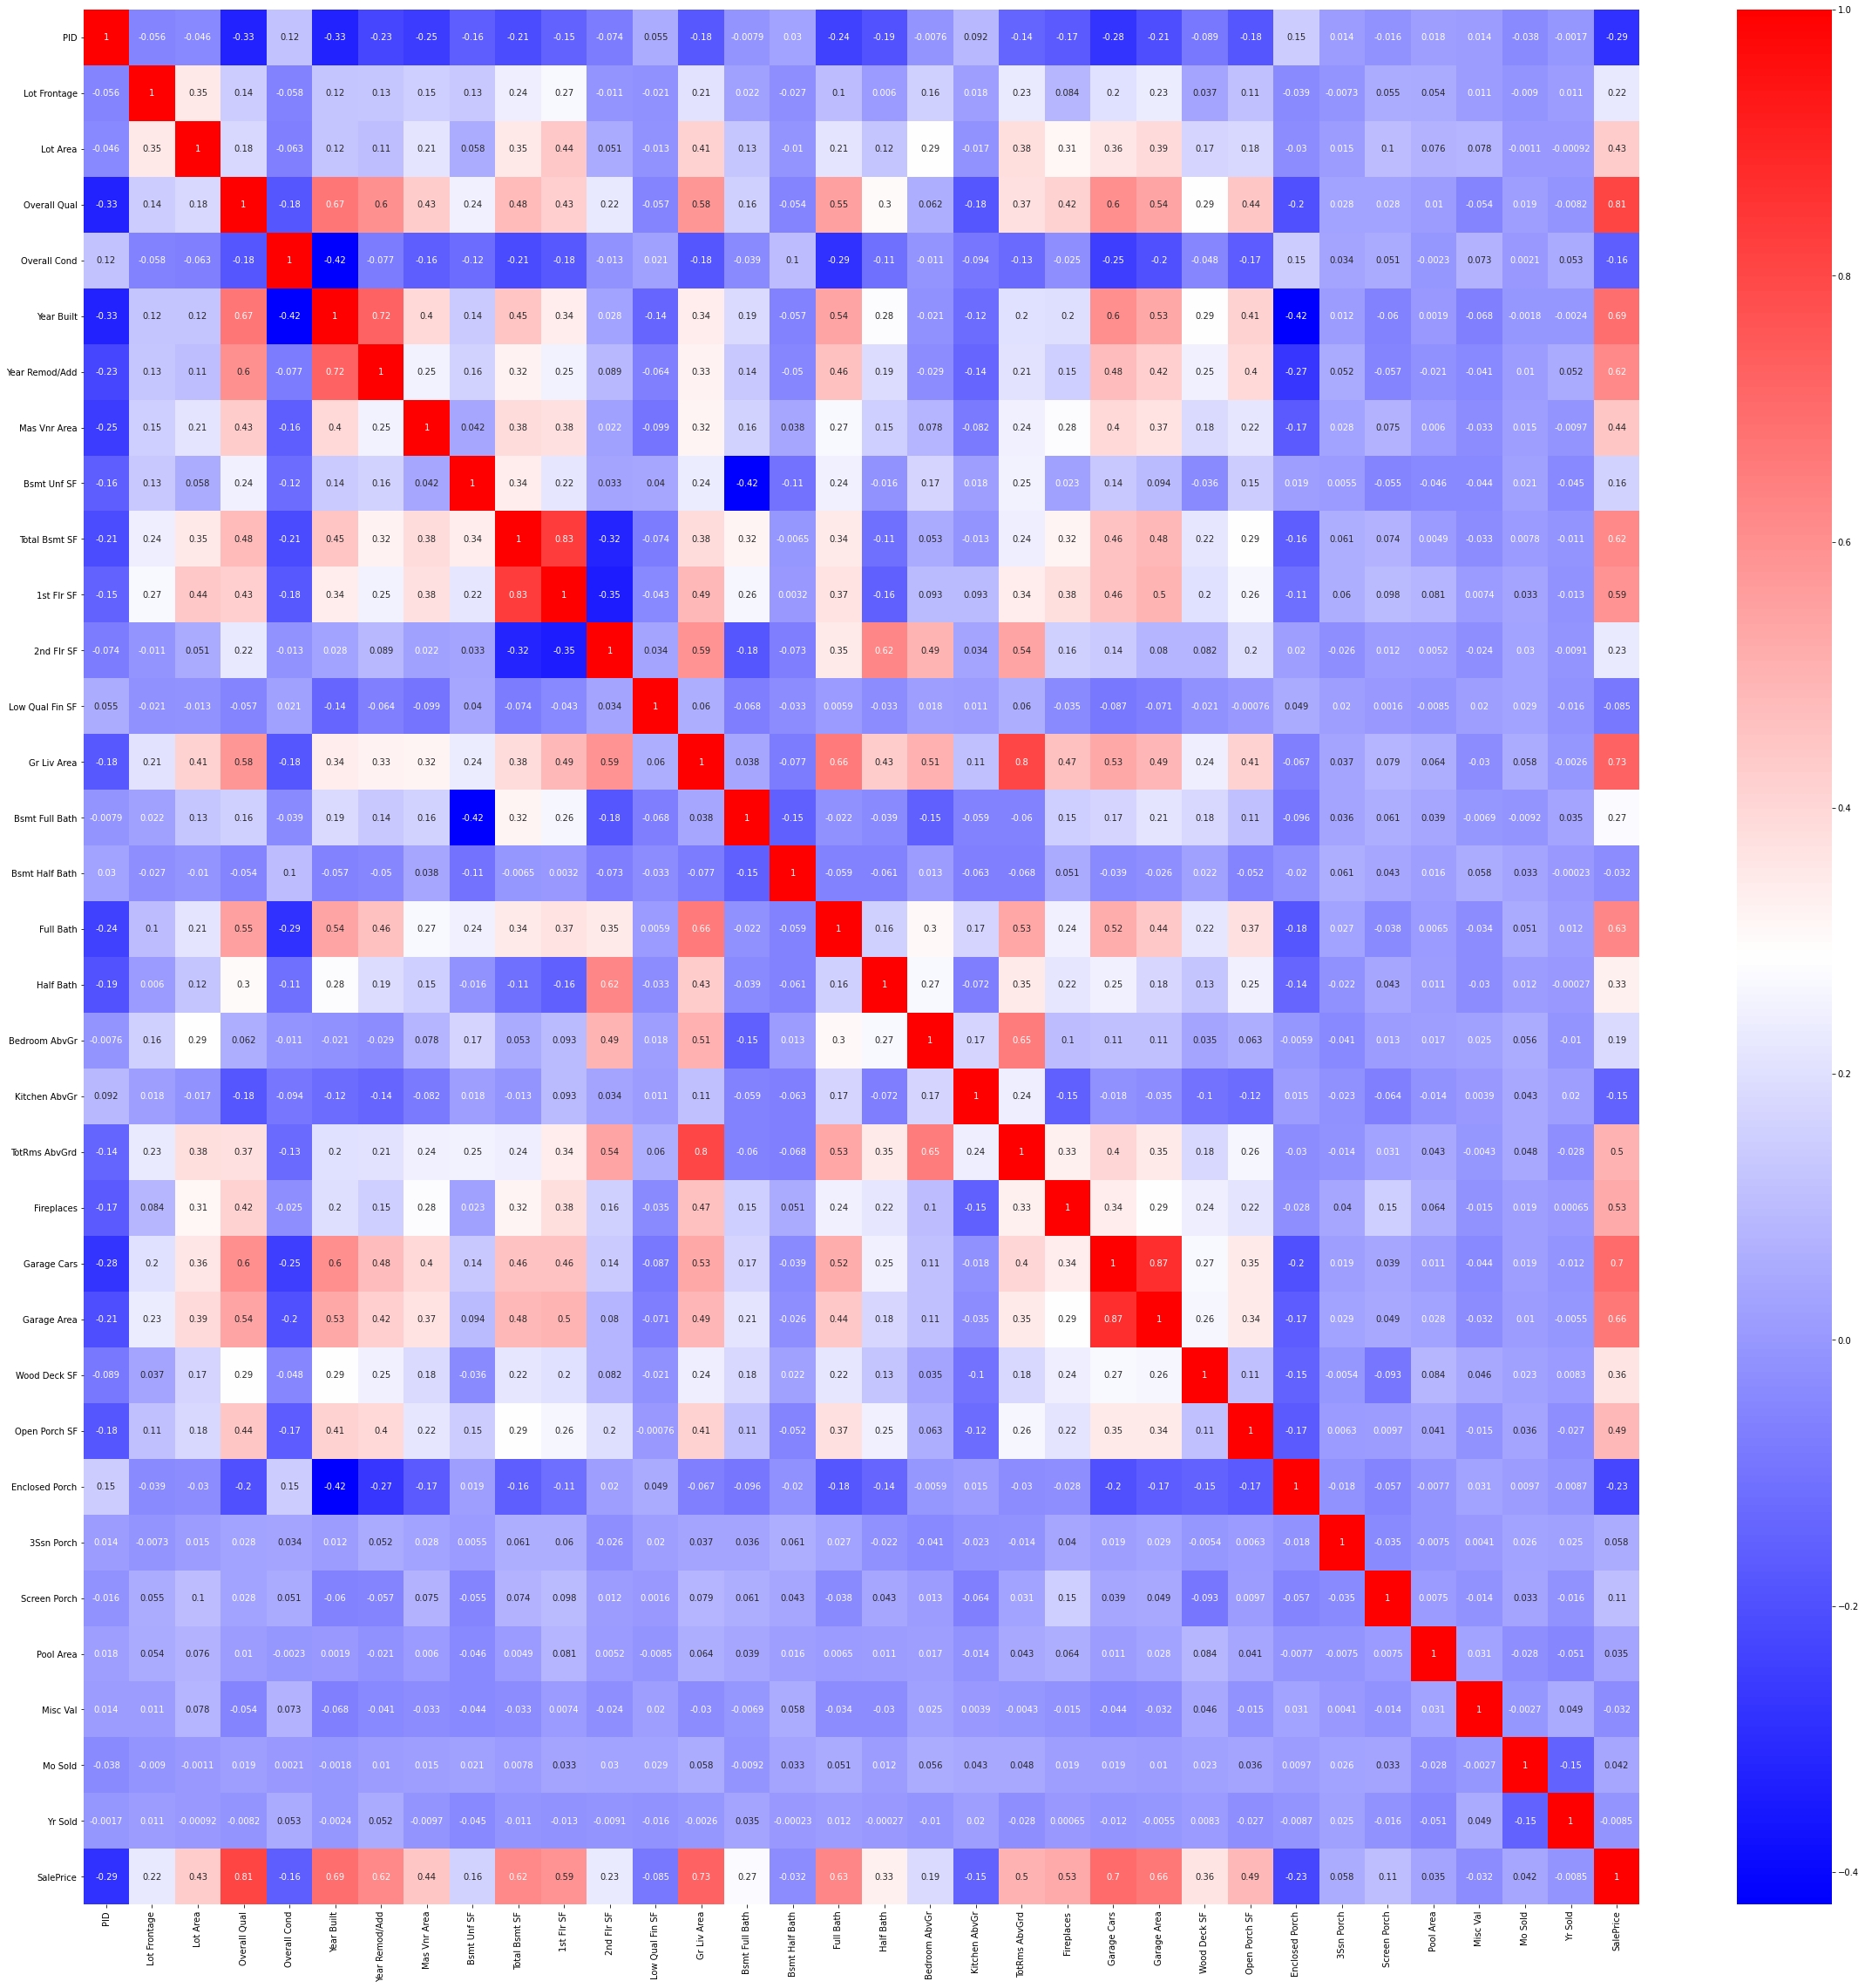

In [217]:
plt.figure(figsize=(40,40))
sns.heatmap(df_c1.corr(method='spearman'), annot=True, cmap='bwr')

Living area, year built, overall quality and garage size still seem to be the variables most strongly positively correalted with sale price.

## Deeper Exploration of Target vs Predictors

In [218]:
target = 'SalePrice'

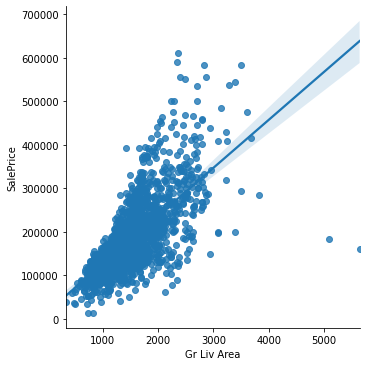

In [219]:
sns.lmplot(data=df_c1, x='Gr Liv Area', y=target)

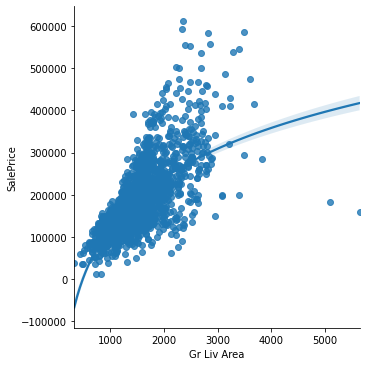

In [220]:
sns.lmplot(data=df_c1, x='Gr Liv Area', y=target, logx=True)

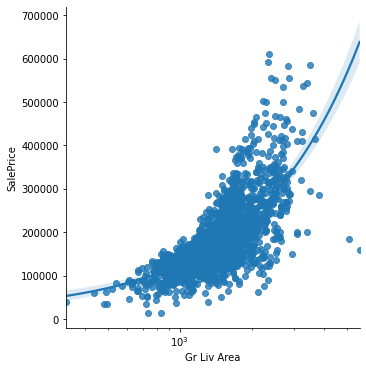

In [221]:
sns.lmplot(data=df_c1, x='Gr Liv Area', y=target)
plt.xscale('log')
# plt.yscale('log')

Taking 'Gr Liv Area' on log scale seems to fit the relation to 'SalePrice' better.

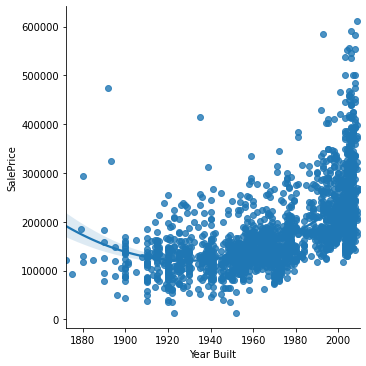

In [222]:
sns.lmplot(data=df_c1, x='Year Built', y=target, order=2)

Order 2 seems to characterise the 'Year Built' and 'SalePrice' relation well.

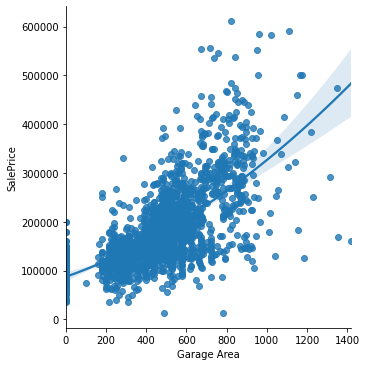

In [223]:
sns.lmplot(data=df_c1, x='Garage Area', y=target, order=2)
# plt.xscale('log')

Order 2 seems to characterise the 'Garage Area' and 'SalePrice' relation well.

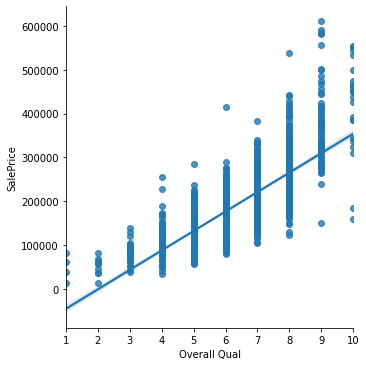

In [224]:
sns.lmplot(data=df_c1, x='Overall Qual', y=target)

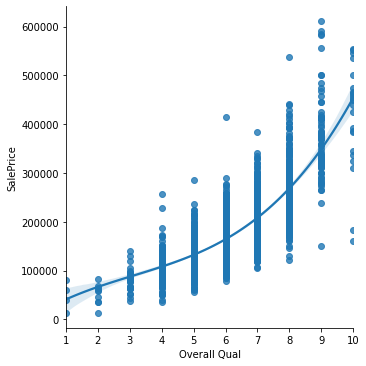

In [225]:
sns.lmplot(data=df_c1, x='Overall Qual', y=target, order=3)

In [226]:
dfp = df[['Gr Liv Area', 'Overall Qual', 'SalePrice']]

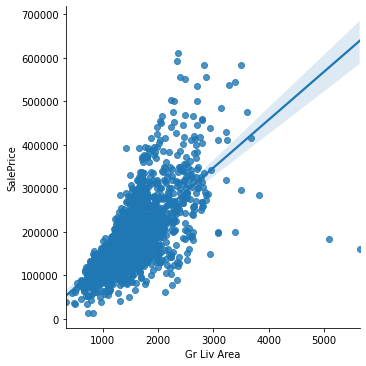

In [227]:
sns.lmplot(data=df, x='Gr Liv Area', y=target)

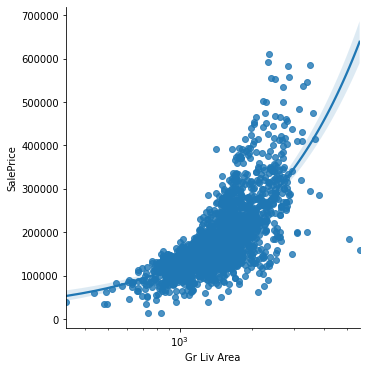

In [228]:
sns.lmplot(data=dfp, x='Gr Liv Area', y=target)
plt.xscale('log')

In [229]:
dfp['Root GLA'] = dfp['Gr Liv Area']**0.5

<ipython-input-229-a8a1a595907a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Root GLA'] = dfp['Gr Liv Area']**0.5


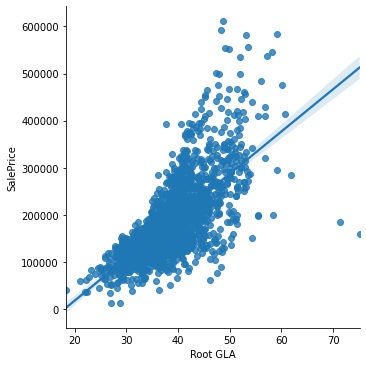

In [230]:
sns.lmplot(data=dfp, x='Root GLA', y=target)

In [233]:
dfp['Power 1.2 GLA'] = dfp['Gr Liv Area']**1.2

<ipython-input-233-68f6a9fc6c17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Power 1.2 GLA'] = dfp['Gr Liv Area']**1.2


<AxesSubplot:xlabel='Power 1.2 GLA', ylabel='SalePrice'>

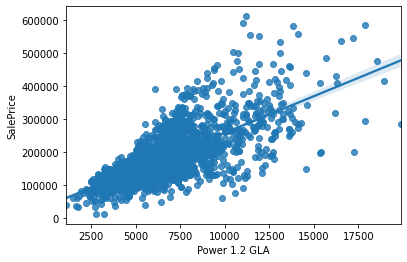

In [234]:
sns.regplot(data=dfp[dfp['Power 1.2 GLA'] < 25000], x='Power 1.2 GLA', y=target)

In [235]:
dfp['Power 1.5 GLA'] = dfp['Gr Liv Area']**1.5

<ipython-input-235-ac6fb8b97130>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Power 1.5 GLA'] = dfp['Gr Liv Area']**1.5


<AxesSubplot:xlabel='Power 1.5 GLA', ylabel='SalePrice'>

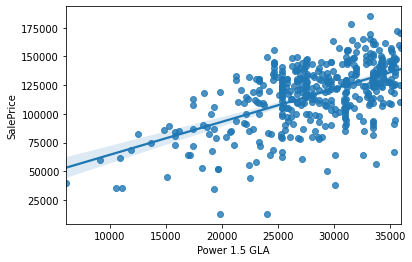

In [236]:
sns.regplot(data=dfp[dfp['Power 1.5 GLA'] < 36000], x='Power 1.5 GLA', y=target)

From the log and powered features and their plots, dropping the outliers seem to provide a good fit for both 1.2 and 1.5 times power features. With Sale Price outliers remaining, the log transform accounts for the outliers better, but does not seem to fit a linear model better than when outliers are removed and the features transformed based on 1.2 and 1.5 powers.

Next, some transformations of the Overall Quality variable will be explored.

In [237]:
dfp['OQ CubeRoot'] = dfp['Overall Qual'] ** (1/3)

<ipython-input-237-0fec0fd8a9f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['OQ CubeRoot'] = dfp['Overall Qual'] ** (1/3)


In [238]:
dfp['OQ Cube'] = dfp['Overall Qual'] ** 3

<ipython-input-238-bd95433a9139>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['OQ Cube'] = dfp['Overall Qual'] ** 3


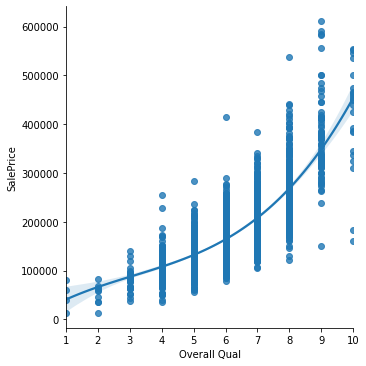

In [239]:
sns.lmplot(data=df_c1, x='Overall Qual', y=target, order=3)

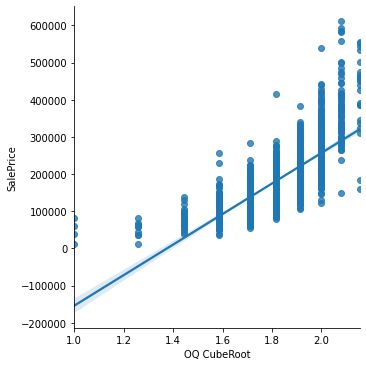

In [240]:
sns.lmplot(data=dfp, x='OQ CubeRoot', y=target)

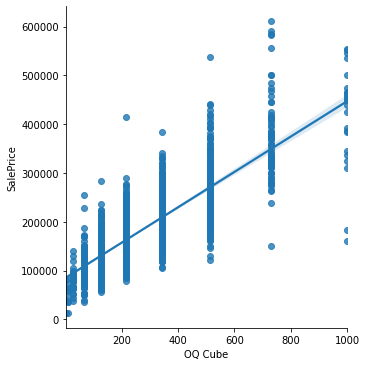

In [241]:
sns.lmplot(data=dfp, x='OQ Cube', y=target)

Order 3 seems to characterise relatin between 'Overall Qual' and 'SalePrice' relation well.

### Addressing Outliers

According to the [data documentation](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt), there are 5 outliers, described as houses with a Gr Liv Area of more than 4k, and the advice in the documentation is to remove them.

While our earlier data analysis showed that the outliers are somewhat explainable due to the house sizes, some examples above (such as the transformation of numeric variables) have shown that these outliers (based on Gr Liv Area, not Price) can compromise the fit to the linear model for the ret of the data. As such, they will be dropped.

In [242]:
df_c1[df_c1['Gr Liv Area'] > 4000][['Gr Liv Area','SalePrice']]

Gr Liv Area  SalePrice
960          5642     160000
1885         5095     183850

The other 3 examples must be in the test set. It would be sensible to drop these two outliers, as although our model might not be able to account for outliers of that nature if we do so, dropping the outliers would allow the model to generalise more accurately to unseen data in the more common range of prices, increasing the practical utility of the model to help predict prices of more home in Ames.

In [243]:
df_c1.shape

(2051, 53)

In [244]:
df_c1 = df_c1[df_c1['Gr Liv Area'] < 4000]

In [245]:
df_c1.shape

(2049, 53)

### Check Final State of Variables

In [246]:
print('discr:\t', discr_vars, '\n\n', 
'nom:\t', nom_vars, '\n\n', 
'ord:\t', ord_vars, '\n\n',
'size:\t', size_vars, '\n\n',
'time:\t', time_vars, '\n\n',
'price:\t', price_vars, '\n\n',
'bin:\t', bin_vars, '\n\n',
'id:\t', id_vars)

discr:	 {'Kitchen AbvGr', 'Bedroom AbvGr', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars', 'Bsmt Half Bath', 'Fireplaces', 'Bsmt Full Bath', 'Half Bath'} 

 nom:	 {'Heating', 'MS SubClass', 'Roof Style', 'Utilities', 'MS Zoning', 'House Style', 'PID', 'Paved Drive', 'Bldg Type', 'Exterior 1st', 'Mas Vnr Type', 'Lot Config', 'Condition 1', 'Sale Type', 'Land Contour', 'Roof Matl', 'Lot Shape', 'Neighborhood', 'Condition 2', 'Garage Type', 'Misc Feature', 'Exterior 2nd', 'Land Slope', 'Electrical', 'Foundation'} 

 ord:	 {'Garage Qual', 'Exter Qual', 'Pool QC', 'Kitchen Qual', 'Garage Cond', 'Functional', 'Garage Finish', 'Exter Cond', 'Fence', 'Fireplace Qu', 'Overall Cond', 'Heating QC', 'Overall Qual'} 

 size:	 {'Gr Liv Area', '2nd Flr SF', 'BsmtFin SF 2', 'Enclosed Porch', 'Lot Area', 'Open Porch SF', 'Low Qual Fin SF', 'Wood Deck SF', 'Screen Porch', 'Bsmt Unf SF', 'Mas Vnr Area', 'Total Bsmt SF', 'Pool Area', '3Ssn Porch', 'BsmtFin SF 1', 'Lot Frontage', 'Garage Area', '1st Flr SF'} 

In [247]:
drop_vars

{'Bldg Type',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Qual',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Condition 1',
 'Condition 2',
 'Electrical',
 'Exter Cond',
 'Exterior 1st',
 'Exterior 2nd',
 'Fence',
 'Functional',
 'Garage Cond',
 'Garage Qual',
 'Garage Yr Blt',
 'Heating',
 'Id',
 'Land Slope',
 'MS SubClass',
 'Misc Feature',
 'Pool QC',
 'Roof Matl',
 'Street',
 'Utilities'}

## Save Data

In [248]:
# df_c1.to_csv('../datasets/train_df_c1.csv', index=False)

### Feature Engineering in Next Notebook

See [Notebook 2](02_Preprocessing_and_Feature_Engineering.ipynb)


## Consolidated Feature Engineering Plan

<br>
<br>

<details>
    <summary>Consolidated Steps from EDA</summary>
    
    0. PID should be converted to a binary variable that represents the two groups, PID starting with 5 and PID starting with 9.

    1. Consolidate these basement variables:
    - BsmtFinSF1: Type 1 finished square feet
    - BsmtFinType2: Quality of second finished area (if present)
    - BsmtFinSF2: Type 2 finished square feet
    - BsmtUnfSF: Unfinished square feet of basement area

        Use TotalBsmtSF

    2. Consolidate these bathroom variables:
    - 'Bsmt Full Bath'
    - 'Bsmt Half Bath'
    - 'Full Bath' (full baths above ground)
    - 'Half Bath' (half baths above ground)

        Make new feature of total bathrooms.


    3. Garage year seems useless, garage cars and garage area can be consolidated


    4. For MS Zoning, consider converting to binary of FV and the rest.


    5. For Lot Shape, convert to binary of regular vs the rest/irregular.


    6. For Land Contour, convert to binary to HLS (on a hill) and the rest.


    7. For Lot Config, convert to CulDSac and the rest.


    8. Neighborhoods will need to be remapped to more sensible buckets of categories.


    9. Convert House Style to binary between 1 Floor and the rest.


    10. Convert Roof Style to binary between Hip and the rest.


    11. Convert Mas Vnr Type to Stone Vnr, Vnr (including Stone, basically not 'None') and None (just cols for first two).


    12. Convert Exter Qual to scale of 0-2, 0 for Fa/Po, 1 for TA, 2 for Gd/Ex.


    13. Convert Foundation to binary between PConc and the rest.


    14. Convert Central Air Yes/No to 1/0. 


    15. Convert Heating QC to Excellent and the rest.


    16. Convert Kitchen Qual to 0-2, Ex(2), Gd(1), everything else (0).


    17. Convert Fireplace Qual to 0-2, Ex(2), Gd(1), everything else (0).


    18. Convert Garage Type to Built-In/Attached and everything else.


    19. Convert Garage Finish to Finished (Fin & Rfn) and everthing else (Unf & None).


    20. Convert Paved Drive to Paved (1) for Y and 0 for everthing else.


    21. Convert 'Sale Type' to 'New Sale' (1) and everthing else (0).
    
    22. Convert Alley to No access (0) and everthing else (essentiall has alley access).
    
</details>